In [1]:
import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
import sympy as sy
from numpy import linalg as LA
from IPython.display import Latex,display
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette('bright')
from Energy_Levels import MoleculeLevels
from Energy_Levels import branching_ratios, Calculate_TDMs,Calculate_TDM_evecs
from functools import partial
np.set_printoptions(precision=5, suppress=True)
from tabulate import tabulate
from matplotlib.collections import LineCollection

In [2]:
%matplotlib inline

In [3]:
N_list = [0,1,2]
print(N_list)

[0, 1, 2]


In [4]:
# X010 = MoleculeLevels.initialize_state('CaOH','40','X010',N_list,M_values = 'custom',I=[0,1/2],S=1/2,round=16,M_range=[1])
X000 = MoleculeLevels.initialize_state('CaOH','40','X000',N_list,M_values = 'none',I=[0,1/2],S=1/2,round=8,P_values=[1/2])

Cannot construct decoupled basis without M values


In [5]:
B0 = 1e-3
E0 = 0
evals, evecs = X000.eigensystem(E0,B0,order=True,method='torch')

In [6]:
B0 = 1e-3
E0 = 0
evals, evecs = X000.eigensystem(E0,B0,order=True,method='torch')
M0_idx = X000.select_q({'M':0,})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X000.evals0[i],4))+r'\:\mathrm{MHz}$'))
#     print('Decoupled:')
#     display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
#     print('Case A:')
#     display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','J','F','Sigma','P','M'],round=4)))
    print('Case B:')
    print('Parity=',X000.parities[i])
    display(Latex(X000.gen_state_str(i,thresh=0.0005,round=4)))
    print('\n')

[0 1 2 3 4 5 6 7 8 9]




<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

In [6]:
N_idx = [X010.select_q({'N':N}) for N in N_list]

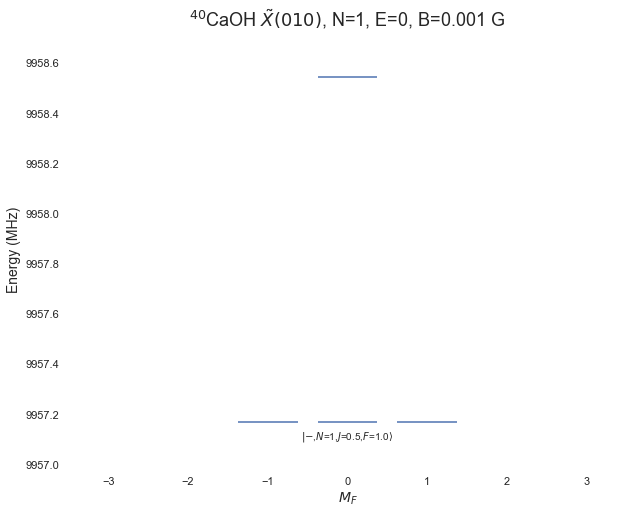

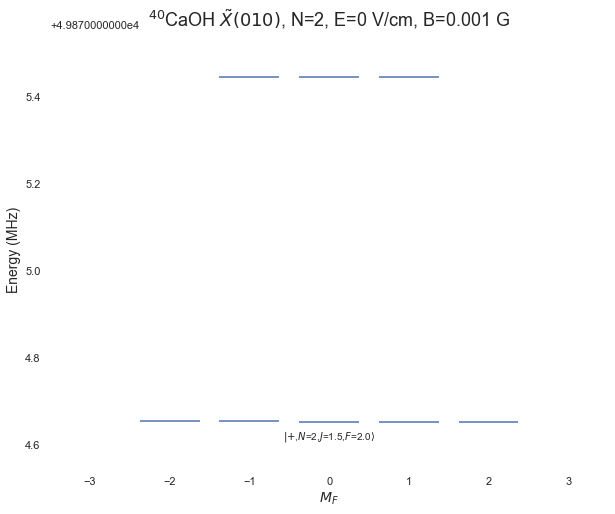

In [7]:
N=1
X010.display_levels(0,1e-3,'J',idx=X010.select_q({'N':N,'J':0.5},parity='-'),parity=True,label_q=[q for q in X010.q_str if q not in ['K']],label_off=0.05,figsize=(10,8),alt_label=False)
plt.title(X010.state_str+', N={}, E={}, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)
# plt.ylim(10000,10020)
plt.grid(False)
ax = plt.gca()
ax.set_facecolor('None')

N=2
X010.display_levels(0,1e-3,'J',idx=X010.select_q({'N':N,'J':1.5},parity='+'),parity=True,label_q=[q for q in X010.q_str if q not in ['K']],label_off=0.05,figsize=(10,8),alt_label=False)
plt.title(X010.state_str+', N={}, E={} V/cm, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)
# plt.ylim(50000,50020)
ax = plt.gca()
ax.set_facecolor('None')
plt.grid(False)

In [99]:
Bstep = 0.001
Bz = np.arange(0,1+Bstep,Bstep)
Bz[0]=1e-4
Estep = 0.25
Ez = np.arange(0,150+Estep,Estep)

Text(0.5, 1.0, 'CaOH X(010) N=2, J=3/2+ Zeeman Shifts, E=0 V/cm')

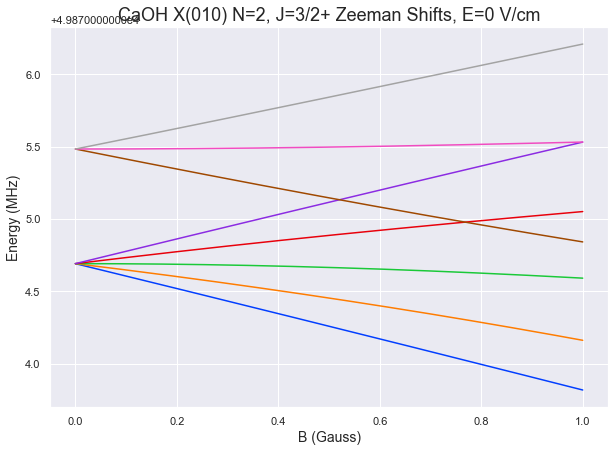

In [103]:
X010.ZeemanMap(Bz,0,plot=True,idx = X010.select_q({'N':2,'J':1.5},parity='+'))
plt.title('CaOH X(010) N=2, J=3/2+ Zeeman Shifts, E=0 V/cm',fontsize=18)

Text(0.5, 1.0, 'CaOH X(010) N=1,J=1/2- Stark Shifts')

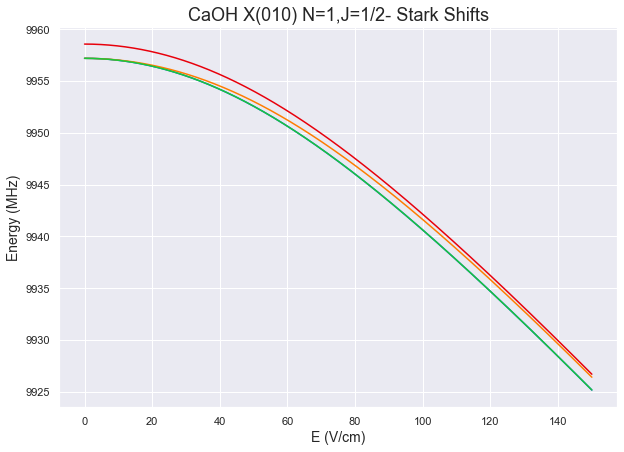

In [24]:
X010.StarkMap(Ez,1e-3,plot=True,idx = X010.select_q({'N':1,'J':0.5},parity='-'))
plt.title('CaOH X(010) N=1,J=1/2- Stark Shifts',fontsize=18)

Text(0.5, 1.0, 'CaOH X(010) N=1- Zeeman Shifts')

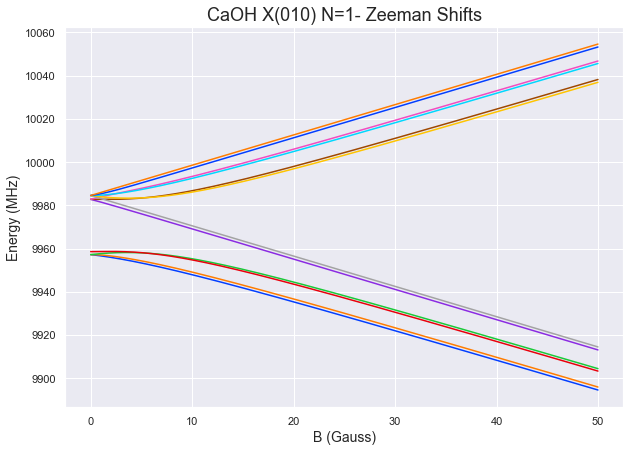

In [242]:
X010.ZeemanMap(Bz,0,plot=True,idx = X010.select_q({'N':1},parity='-'))
plt.title('CaOH X(010) N=1- Zeeman Shifts',fontsize=18)

Text(0.5, 1.0, 'CaOH X(010) N=2+,J=3/2 Zeeman Shifts')

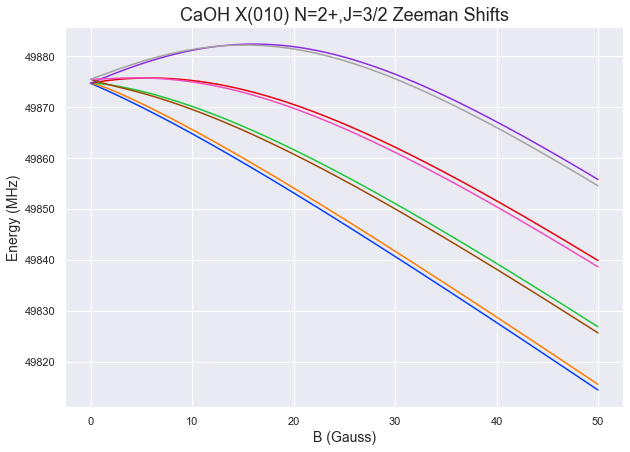

In [243]:
X010.ZeemanMap(Bz,0,plot=True,idx = X010.select_q({'N':2,'J':1.5},parity='+'))
plt.title('CaOH X(010) N=2+,J=3/2 Zeeman Shifts',fontsize=18)

In [8]:
B0 = 1e-3
E0 = 0
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')
M0_idx = X010.select_q({'M':0,})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
#     print('Decoupled:')
#     display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
#     print('Case A:')
#     display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','J','F','Sigma','P','M'],round=4)))
    print('Case B:')
    print('Parity=',X010.parities[i])
    display(Latex(X010.gen_state_str(i,thresh=0.0005,round=4)))
    print('\n')

[ 1  3  5  9 13 15 17 21 26 30 34 40 46 50 54 60]




<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

In [282]:
E0=50
B0=1e-4
TDM0 = 1.465*Calculate_TDMs(0,N1,N2,E0,B0,[0])
# TDMp = 1.465*Calculate_TDMs(1,X010,X010,E0,B0)
# TDMm = 1.465*Calculate_TDMs(-1,X010,X010,E0,B0)
# TDMx = -1/np.sqrt(2)*(TDMp - TDMm)

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ


In [283]:
def l2s(inputlist):
      """
      Convert a flatten list to a list of slices:
      test = [0,2,3,4,5,6,12,99,100,101,102,13,14,18,19,20,25]
      list_to_slices(test)
      -> [(0, 0), (2, 6), (12, 14), (18, 20), (25, 25), (99, 102)]
      """
      inputlist.sort()
      pointers = np.where(np.diff(inputlist) > 1)[0]
      pointers = zip(np.r_[0, pointers+1], np.r_[pointers, len(inputlist)-1])
      slices = [(inputlist[i], inputlist[j]+1) for i, j in pointers]
      return slices

In [286]:
N1_all = N1.select_q({'N':1,'F':0},parity='-')
N2_all = N2.select_q({'N':2,'M':0},parity='+')

In [289]:
N2s

(4, 5)

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_20532/4255074159.py:40: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mat, ax=ax,fraction=0.015, pad=0.05)


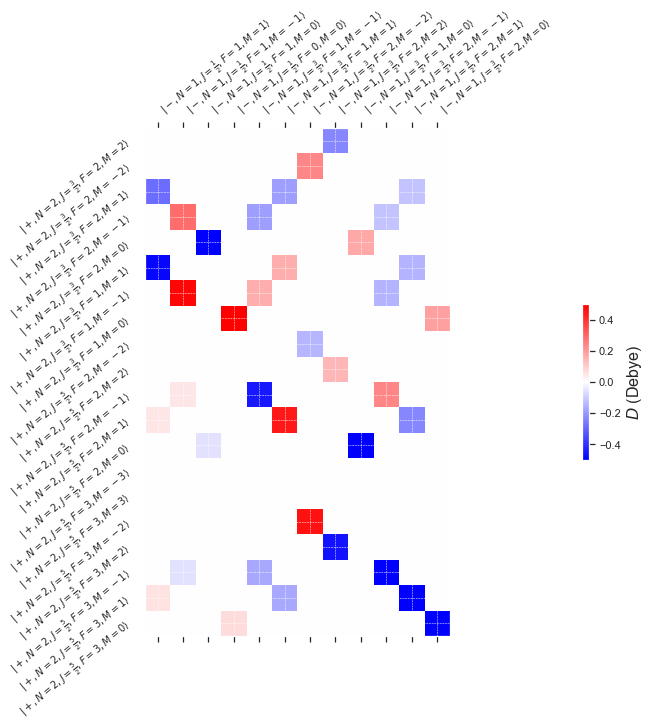

In [290]:
fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
# ax.set_aspect('equal')
N1_all = N1.select_q({'N':1},parity='-')
N2_all = N2.select_q({'N':2},parity='+')
N1s = l2s(N1_all)[0]
N2s = l2s(N2_all)[0]
N1l = np.arange(*N1s)
N2l = np.arange(*N2s)
log=False
BR_plot = TDM0 #convert MHz/V/cm to Debye
if log:
    BR_plot=np.log10(BR_plot)
    vmin = -10
    vmax = 0
else:
    vmin=None
    vmax = None
#     log_BR = np.copy(BR0)
#     for i,val1 in enumerate(log_BR):
#         for j,val2 in enumerate(val1):
#             if val2 !=0:
#                 log_BR[i,j] = np.log10(val2)
#     BR_plot = log_BR
mat = ax.matshow(BR_plot[slice(*N2s),slice(*N1s)],cmap=plt.get_cmap('bwr'),vmax = 0.5, vmin = -0.5)
y = np.arange(0,len(N2l))
x = np.arange(0,len(N1l))
ax.set_yticks(y)
ax.set_xticks(x)
y_labels = [N2.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['N','J','F','M']) for i in N2l]
x_labels = [N1.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['N','J','F','M']) for i in N1l]
# x_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N2]
# y_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N1]
ax.set_yticklabels(y_labels, rotation='40', fontsize=12, ha='right')
ax.set_xticklabels(x_labels, rotation='40', fontsize=12,ha='left')
ax.tick_params(axis='both',labelsize=10,direction='out')
ax.grid(True,which='major',color='white',ls='--',linewidth=0.5)
ax.grid(False,which='minor')
(bot,top) = ax.get_ylim()
# ax.set_ylim(bot+0.5, top-0.5)
cbar = fig.colorbar(mat, ax=ax,fraction=0.015, pad=0.05)
cbar.set_label(label=r'$D$ (Debye)',size=16)
#ax.set_xlim(-0.5,x.size+0.5);

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_3440/1571935017.py:41: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mat, ax=ax,fraction=0.03, pad=0.0,extend='min')


Text(0.5, 1.0, '$|D|$ (Debye)')

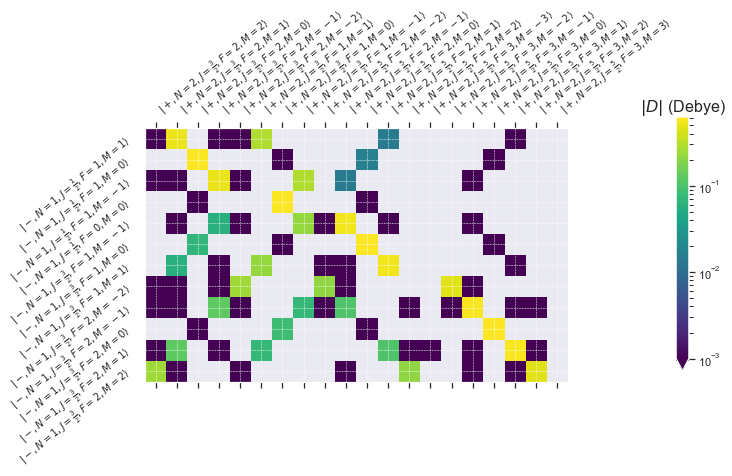

In [18]:
fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
# ax.set_aspect('equal')
N1_all = X010.select_q({'N':1},parity='-')
N2_all = X010.select_q({'N':2},parity='+')
N1s = l2s(N1_all)[0]
N2s = l2s(N2_all)[0]
N1 = np.arange(*N1s)
N2 = np.arange(*N2s)
log=False
BR_plot = abs(TDM0)
BR_plot[BR_plot<1e-8]=0
if log:
    BR_plot=np.log10(BR_plot)
    vmin = -10
    vmax = 0
else:
    vmin=None
    vmax = None
#     log_BR = np.copy(BR0)
#     for i,val1 in enumerate(log_BR):
#         for j,val2 in enumerate(val1):
#             if val2 !=0:
#                 log_BR[i,j] = np.log10(val2)
#     BR_plot = log_BR
mat = ax.matshow(BR_plot[slice(*N1s),slice(*N2s)],cmap=sns.color_palette("viridis", as_cmap=True),norm=colors.LogNorm(vmin=1e-3))#vmax = vmax, vmin = -3)
x = np.arange(0,len(N2))
y = np.arange(0,len(N1))
ax.set_yticks(y)
ax.set_xticks(x)
x_labels = [X010.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['N','J','F','M']) for i in N2]
y_labels = [X010.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['N','J','F','M']) for i in N1]
# x_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N2]
# y_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N1]
ax.set_yticklabels(y_labels, rotation='40', fontsize=12, ha='right')
ax.set_xticklabels(x_labels, rotation='40', fontsize=12,ha='left')
ax.tick_params(axis='both',labelsize=10,direction='out')
ax.grid(True,which='major',color='white',ls='--',linewidth=0.5)
ax.grid(False,which='minor')
(bot,top) = ax.get_ylim()
# ax.set_ylim(bot+0.5, top)
cbar = fig.colorbar(mat, ax=ax,fraction=0.03, pad=0.0,extend='min')
cbar.ax.set_title(label=r'$|D|$ (Debye)',size=16,rotation=0)
#ax.set_xlim(-0.5,x.size+0.5);

In [9]:
from tabulate import tabulate

In [22]:
header_N21 = ['Transition','Estimated Frequency (GHz)','Dipole Moment (D)']
table_N21=[]
N1_p = X010.select_q({'N':1,'J':0.5},parity='+')
N2_n = X010.select_q({'N':2,'J':1.5},parity='-')
dz = abs(TDM0)
factor = 10.207 #pi condition for gaussian pulse with FWHM t expressed in us*Debye*sqrt(uW/cm^2)
for i in N2_n:
    EN2 = X010.evals0[i]
    vecN2 = X010.evecs0[i]
    qi = abs(vecN2).argmax()
    for j in N1_p:
        EN1 = X010.evals0[j]
        vecN1 = X010.evecs0[j]
        qj = abs(vecN1).argmax()
        dE = np.round((EN2 - EN1)/1000,7)
        dipole = np.round(dx[j,i],3)
        if dipole >1e-3:
            Ne,Je,Fe,Me = [X010.q_numbers[_q][qi] for _q in ['N','J','F','M']]
            if Me<0:
                continue
            Pe = {1:'+',-1:'-'}[X010.parities[i]]
            Ng,Jg,Fg,Mg = [X010.q_numbers[_q][qj] for _q in ['N','J','F','M']]
            Pg = {1:'+',-1:'-'}[X010.parities[j]]
            t_str = '(N={Ne}{Pe},J={Je},F={Fe},M={Me})->(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
            e_str = str(dE)
            d_str = str(dipole)
            table_N21.append([t_str,e_str,d_str])
#             intensity = np.round((factor/(100)/dipole)**2,5)
#             display(Latex(r'$D\, (\mathrm{Debye}) = '+str(strength)+r'$'))
#             display(Latex(r'For $\tau_{\mathrm{FWHM}} = 100 \,\mathrm{\mu s}$, $I_{\pi}='+str(intensity)+ r'\,\mathrm{\mu W/cm^2}$'))
#             display(Latex(r'$\Delta E =' +str(dE)+ r'\,\mathrm{MHz}$'))
#             display(Latex(r'$|e \rangle = $' + X010.gen_state_str(i,parity=True,single=True,show_coeff=False,label_q=['N','J','F','M'],thresh=0.05,round=4)))
#             display(Latex(r'$|g \rangle = $' + X010.gen_state_str(j,parity=True,single=True,show_coeff=False,label_q=['N','J','F','M'],thresh=0.05,round=4)))
#             print('\n')

NameError: name 'dx' is not defined

In [23]:
header_N12 = ['Transition','Estimated Frequency (GHz)','Dipole Moment (D)']
table_N12=[]
N1_n = X010.select_q({'N':1,'J':0.5},parity='-')
N2_p = X010.select_q({'N':2,'J':1.5},parity='+')
dz = abs(TDM0)
factor = 10.207 #pi condition for gaussian pulse with FWHM t expressed in us*Debye*sqrt(uW/cm^2)
for i in N1_n:
    EN1 = X010.evals0[i]
    vecN1 = X010.evecs0[i]
    qi = abs(vecN1).argmax()
    for j in N2_p:
        EN2 = X010.evals0[j]
        vecN2 = X010.evecs0[j]
        qj = abs(vecN2).argmax()
        dE = np.round((EN2 - EN1)/2,7)
        dipole = np.round(dz[j,i],3)
        if dipole >1e-4:
            Ne,Je,Fe,Me = [X010.q_numbers[_q][qi] for _q in ['N','J','F','M']]
            if Me<0:
                continue
            Pe = {1:'+',-1:'-'}[X010.parities[i]]
            Ng,Jg,Fg,Mg = [X010.q_numbers[_q][qj] for _q in ['N','J','F','M']]
            Pg = {1:'+',-1:'-'}[X010.parities[j]]
            t_str = '(N={Ne}{Pe},J={Je},F={Fe},M={Me})->(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
            e_str = str(dE)
            d_str = str(dipole)
            table_N12.append([t_str,e_str,d_str])
#             intensity = np.round((factor/(100)/dipole)**2,5)
#             display(Latex(r'$D\, (\mathrm{Debye}) = '+str(strength)+r'$'))
#             display(Latex(r'For $\tau_{\mathrm{FWHM}} = 100 \,\mathrm{\mu s}$, $I_{\pi}='+str(intensity)+ r'\,\mathrm{\mu W/cm^2}$'))
#             display(Latex(r'$\Delta E =' +str(dE)+ r'\,\mathrm{MHz}$'))
#             display(Latex(r'$|e \rangle = $' + X010.gen_state_str(i,parity=True,single=True,show_coeff=False,label_q=['N','J','F','M'],thresh=0.05,round=4)))
#             display(Latex(r'$|g \rangle = $' + X010.gen_state_str(j,parity=True,single=True,show_coeff=False,label_q=['N','J','F','M'],thresh=0.05,round=4)))
#             print('\n')

In [24]:
table_N21 = sorted(table_N21,key=lambda x: x[1])
table_N12 = sorted(table_N12,key=lambda x: x[1])

In [25]:
print('All transitions at E=0 V/cm, B=1 mG. Only considering z-polarized light. Transitions with M<0 states are ommitted.')
print('Parameters taken from Fletcher et al. 1995.\nAll errors are dominated by hyperfine uncertainty. If hyperfine is within 10% of X(000), errors are ~<300 kHz\n')
# print(tabulate(table_N21,headers=header_N21,floatfmt=('','.6f','.3f')))
# print()
print(tabulate(table_N12,headers=header_N12,floatfmt=('','.6f','.3f')))

All transitions at E=0 V/cm, B=1 mG. Only considering z-polarized light. Transitions with M<0 states are ommitted.
Parameters taken from Fletcher et al. 1995.
All errors are dominated by hyperfine uncertainty. If hyperfine is within 10% of X(000), errors are ~<300 kHz

Transition                                    Estimated Frequency (GHz)    Dipole Moment (D)
------------------------------------------  ---------------------------  -------------------
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=1,M=0)                 19958.456431                0.598
(N=1-,J=0.5,F=1,M=0)->(N=2+,J=1.5,F=2,M=0)                 19958.747856                0.602
(N=1-,J=0.5,F=1,M=1)->(N=2+,J=1.5,F=2,M=1)                 19958.747860                0.521
(N=1-,J=0.5,F=1,M=1)->(N=2+,J=1.5,F=1,M=1)                 19959.143934                0.289


In [26]:
type(Ez)=='list'

False

In [27]:
d = Calculate_TDMs(0,X010,X010,0,10)

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ


In [28]:
g_idx = X010.select_q({'N':1,'J':0.5},parity='-')

In [32]:
test = np.diag([1,2,3])
test[1,2]=-2
print(test)
v = np.array([0,0,1])
w = np.array([0,1,0])
print(test@v)
print(w@test)
print(w@test@v.T)
print(w@test@v)

[[ 1  0  0]
 [ 0  2 -2]
 [ 0  0  3]]
[ 0 -2  3]
[ 0  2 -2]
-2
-2


In [24]:
Bz[0]

0.001

In [235]:
for i,v in enumerate(np.arange(0,10)[::-1]):
    print(i)
    print(len(np.arange(10),to))

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [12]:
def testfunc(x,y(,a=2,b=3)):
    print(x*2+y**2-a**3+np.sqrt(b))
    
p=partial(testfunc,y=3,a=2)

In [14]:
testfunc(2,3,2,3)
p(2)

6.732050807568877
6.732050807568877


In [29]:
x = np.arange(0,10)
x.mean()

4.5

In [2]:
# def track_transition_E(state_g,qdict_g,state_e,qdict_e,Ez,B0,dipole='z',parity_g='-',parity_e='+',Debye=1.465):
#     tables = []
#     lines = []
#     g_idx = state_g.select_q(qdict_g,parity=parity_g)
#     e_idx = state_e.select_q(qdict_e,parity=parity_e)
#     for E0 in Ez:
#         print(E0)
#         if dipole=='z': 
#             TDM = Debye*Calculate_TDMs(0,state_g,state_e,E0,B0)
#         elif dipole=='x':
#             TDM = Debye*(-1/np.sqrt(2)*(Calculate_TDMs(1,state_g,state_e,E0,B0) - Calculate_TDMs(-1,state_g,state_e,E0,B0)))
#         elif dipole=='+':
#             TDM = Debye*Calculate_TDMs(1,state_g,state_e,E0,B0)
#         elif dipole=='-':
#             TDM = Debye*Calculate_TDMs(-1,state_g,state_e,E0,B0)
#         elif dipole=='all':
#             TDM = Debye*1/np.sqrt(3)*sum([Calculate_TDMs(p,state_g,state_e,E0,B0) for p in [0,1,-1]])
#         field_lines = []
#         field_table = []
#         for i in g_idx:
#             Eg = state_g.evals0[i]
#             vec_g = state_g.evecs0[i]
#             q_g = abs(vec_g).argmax()
#             for j in e_idx:
#                 Ee = state_e.evals0[j]
#                 vec_e = state_e.evecs0[j]
#                 q_e = abs(vec_e).argmax()
#                 dE = np.round((Ee - Eg)/2,7)
#                 strength = np.round(TDM[j,i],4)
#                 if strength >1e-4:
#                     Ne,Je,Fe,Me = [state_e.q_numbers[_q][q_e] for _q in ['N','J','F','M']]
#                     Pe = {1:'+',-1:'-'}[state_e.parities[j]]
#                     Ng,Jg,Fg,Mg = [state_g.q_numbers[_q][q_g] for _q in ['N','J','F','M']]
#                     Pg = {1:'+',-1:'-'}[state_g.parities[i]]
#                     t_str = '(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})->(N={Ne}{Pe},J={Je},F={Fe},M={Me}))'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
#                     e_str = str(dE)
#                     d_str = str(strength)
#                     field_table.append([t_str,e_str,d_str])
#                     field_lines.append(dE)
#         lines.append(sorted(field_lines))
#         tables.append(sorted(field_table,key=lambda x: x[1]))
#     return lines,tables

def transitions_B(state_g,state_e,Bsample,dipole='z',Debye=1.465):
    if state_g.evecs_B is None:
        print('Run ZeemanMap on Ground State')
        return
    if state_e.evecs_B is None or not np.array_equiv(state_e.Bz,state_g.Bz):
        print('Run ZeemanMap on Excited State with same fields as Ground State')
        return
    print('Using E (V/cm) field of',state_g._Ez)
    gBz = state_g.Bz
    TDM_B = np.zeros((len(Bsample),state_e.size,state_g.size))
    dE_B = np.zeros((len(Bsample),state_e.size,state_g.size))
    t_str_B = np.empty_like(dE_B, dtype='object')
    for iB,B0 in enumerate(Bsample):
        idx = np.searchsorted(gBz,B0)
        B0 = gBz[idx]
        print(B0)
        TDM_func = partial(Calculate_TDM_evecs,G_evecs=state_g.evecs_B[idx],Ground=state_g,E_evecs = state_e.evecs_B[idx],Excited=state_e,q=[0])
        TDM_dict = {
            'z': TDM_func(0),
            '+': TDM_func(1),
            '-': TDM_func(-1),
                   }
        if dipole=='z' or dipole=='+' or dipole=='-':
            TDM = TDM_dict[dipole]
        elif 'x' in dipole:
            TDMx = -1/np.sqrt(2)*(TDM_dict['+']-TDM_dict['-'])
            if dipole=='x':
                TDM=TDMx
            elif dipole=='x+z' or dipole=='z+x':
                TDM = 1/np.sqrt(2)*(abs(TDMx)+abs(TDM_dict['z']))
        elif dipole=='all':
            TDM = 1/np.sqrt(3)*(TDM_dict['z']+TDM_dict['+']+TDM_dict['-'])
        else:
            TDM = 1/np.sqrt(3)*(abs(TDM_dict['z'])+abs(TDM_dict['+'])+abs(TDM_dict['-']))
        TDM*=Debye
        TDM_B[iB,:,:] = TDM
        for i in range(state_g.size):
            Eg = state_g.evals_B[idx][i]
            vec_g = state_g.evecs_B[0][i] #correlate with zero field state
            q_g = abs(vec_g).argmax()
            for j in range(state_e.size):
                Ee = state_e.evals_B[idx][j]
                vec_e = state_e.evecs_B[0][j]
                q_e = abs(vec_e).argmax()
                dE = (Ee - Eg)/2
                dE_B[iB,j,i] = dE
                Ne,Je,Fe,Me = [state_e.q_numbers[_q][q_e] for _q in ['N','J','F','M']]
                Pe = {1:'+',-1:'-'}[state_e.parities[j]]
                Ng,Jg,Fg,Mg = [state_g.q_numbers[_q][q_g] for _q in ['N','J','F','M']]
                Pg = {1:'+',-1:'-'}[state_g.parities[i]]
                t_str = '(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})->(N={Ne}{Pe},J={Je},F={Fe},M={Me})'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
                t_str_B[iB,j,i] = t_str
    return TDM_B,dE_B,t_str_B


def transitions_E(state_g,state_e,Esample,dipole='z',Debye=1.465):
    if state_g.evecs_E is None:
        print('Run StarkMap on Ground State')
        return
    if state_e.evecs_E is None or not np.array_equiv(state_e.Ez,state_g.Ez):
        print('Run StarkMap on Excited State with same fields as Ground State')
        return
    print('Using B (G) field of',state_g._Bz)
    gEz = state_g.Ez
    TDM_E = np.zeros((len(Esample),state_e.size,state_g.size))
    dE_E = np.zeros((len(Esample),state_e.size,state_g.size))
    t_str_E = np.empty_like(dE_E, dtype='object')
    for iE,E0 in enumerate(Esample):
        idx = np.searchsorted(gEz,E0)
        E0 = gEz[idx]
        print(E0)
        TDM_func = partial(Calculate_TDM_evecs,G_evecs=state_g.evecs_E[idx],Ground=state_g,E_evecs = state_e.evecs_E[idx],Excited=state_e,q=[0])
        TDM_dict = {
            'z': TDM_func(0),
            '+': TDM_func(1),
            '-': TDM_func(-1),
                   }
        if dipole=='z' or dipole=='+' or dipole=='-':
            TDM = TDM_dict[dipole]
        elif 'x' in dipole:
            TDMx = -1/np.sqrt(2)*(TDM_dict['+']-TDM_dict['-'])
            if dipole=='x':
                TDM=TDMx
            elif dipole=='x+z' or dipole=='z+x':
                TDM = 1/np.sqrt(2)*(abs(TDMx)+abs(TDM_dict['z']))
        elif dipole=='all':
            TDM = 1/np.sqrt(3)*(TDM_dict['z']+TDM_dict['+']+TDM_dict['-'])
        else:
            TDM = 1/np.sqrt(3)*(abs(TDM_dict['z'])+abs(TDM_dict['+'])+abs(TDM_dict['-']))
        TDM*=Debye
        TDM_E[iE,:,:] = TDM
        for i in range(state_g.size):
            Eg = state_g.evals_E[idx][i]
            vec_g = state_g.evecs_E[0][i] #correlate with zero field state
            q_g = abs(vec_g).argmax()
            for j in range(state_e.size):
                Ee = state_e.evals_E[idx][j]
                vec_e = state_e.evecs_E[0][j]
                q_e = abs(vec_e).argmax()
                dE = (Ee - Eg)/2
                dE_E[iE,j,i] = dE
                Ne,Je,Fe,Me = [state_e.q_numbers[_q][q_e] for _q in ['N','J','F','M']]
                Pe = {1:'+',-1:'-'}[state_e.parities[j]]
                Ng,Jg,Fg,Mg = [state_g.q_numbers[_q][q_g] for _q in ['N','J','F','M']]
                Pg = {1:'+',-1:'-'}[state_g.parities[i]]
                t_str = '(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})->(N={Ne}{Pe},J={Je},F={Fe},M={Me})'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
                t_str_E[iE,j,i] = t_str
    return TDM_E,dE_E,t_str_E

def print_table_E(Evals,TDM_E,dE_E,t_str_E,g_idx,e_idx,cut=True,thresh = 0.001,dipole='z'):
    header = ['Transition','Estimated Frequency (MHz/2)','Dipole Moment (D)']
    all_table = []
    for iE in range(len(Evals)):
        print('\nE (V/cm) =',Evals[iE])
        print('Pol =',dipole)
        E_table = []
        for i in g_idx:
            for j in e_idx:
                _TDM = TDM_E[iE,j,i]
                _dE = dE_E[iE,j,i]
                _t_str = t_str_E[iE,j,i]
                if _dE<0:
                    continue
                if abs(_TDM)<thresh and cut:
                    continue
                E_table.append([_t_str,str(_dE),str(_TDM)])
        E_table = sorted(E_table,key=lambda x: x[1])
        print(tabulate(E_table,headers=header,floatfmt=('','.6f','.4f')))
        all_table.append(E_table)
    return all_table

def print_table_B(Bvals,TDM_B,dE_B,t_str_B,g_idx,e_idx,cut=True,thresh = 0.001,dipole='z'):
    header = ['Transition','Estimated Frequency (MHz/2)','Dipole Moment (D)']
    all_table = []
    for iB in range(len(Bvals)):
        print('\nB (G) =',Bvals[iB])
        print('Pol =',dipole)
        B_table = []
        for i in g_idx:
            for j in e_idx:
                _TDM = TDM_B[iB,j,i]
                _dE = dE_B[iB,j,i]
                _t_str = t_str_B[iB,j,i]
                if _dE<0:
                    continue
                if abs(_TDM)<thresh and cut:
                    continue
                B_table.append([_t_str,str(_dE),str(_TDM)])
        B_table = sorted(B_table,key=lambda x: x[1])
        print(tabulate(B_table,headers=header,floatfmt=('','.6f','.4f')))
        all_table.append(B_table)
    return all_table

def plot_B(Bvals,TDM_B,dE_B,g_idx=None,e_idx=None,thresh = 0.001,title=None,linescale=None,figure=None,**kwargs):
    if g_idx is None:
        g_idx = np.arange(0,TDM_B.shape[2])
    if e_idx is None:
        e_idx = np.arange(0,TDM_B.shape[1])
    if figure is None:
        fig,a = plt.subplots(figsize=(8,6))
    else:
        fig = figure
        a = fig.axes[0]
    for i in g_idx:
        for j in e_idx:
            linestyle='solid'
            _TDM = TDM_B[:,j,i]
            _dE = dE_B[:,j,i]
            if _dE.mean()<0:
                continue
            if abs(_TDM.mean())<thresh:
                continue
            if abs(_TDM.mean())<0.001:
                pass
#                 linestyle='dotted'
            scale_mean=abs(_TDM.mean())/1.465
            scale = 0.5*(abs(_TDM[1:])+abs(_TDM[:-1]))/1.465
            if linescale is None:
                a.plot(Bvals,_dE,linestyle=linestyle,**kwargs)
            else:
                filterByKey = lambda keys: {x: kwargs[x] for x in keys}
                pt_keys = ['marker','mfc','color']
                lc_keys = ['color']
                pt_kwargs = filterByKey(pt_keys)
                lc_kwargs = filterByKey(lc_keys)
                x = Bvals
                y = _dE
                lwidths = scale*linescale
                points = np.array([x, y]).T.reshape(-1, 1, 2)
                segments = np.concatenate([points[:-1], points[1:]], axis=1)
                lc = LineCollection(segments, linewidths=lwidths,**lc_kwargs)
                a.add_collection(lc)
                a.plot(Bvals,_dE,linestyle='None',**pt_kwargs)
    plt.xlabel('Magnetic Field (G)',fontsize=14)
    plt.ylabel('Transition Frequency (MHz/2)',fontsize=14)
#     if title is None:
#         title = 'CaOH Microwave Transitions'
#     plt.title(title,fontsize=18)
    plt.ticklabel_format(useOffset=False, style='plain')
    return

def plot_E(Evals,TDM_E,dE_E,g_idx=None,e_idx=None,thresh = 0.001,title=None,linescale=None,figure=None,**kwargs):
    if g_idx is None:
        g_idx = np.arange(0,TDM_E.shape[2])
    if e_idx is None:
        e_idx = np.arange(0,TDM_E.shape[1])
    if figure is None:
        fig,a = plt.subplots(figsize=(8,6))
    else:
        fig = figure
        a = fig.axes[0]
    for i in g_idx:
        for j in e_idx:
            linestyle='solid'
            _TDM = TDM_E[:,j,i]
            _dE = dE_E[:,j,i]
            if _dE.mean()<0:
                continue
            if abs(_TDM.mean())<thresh:
                continue
            if abs(_TDM.mean())<0.001:
                pass
#                 linestyle='dotted'
            scale_mean=abs(_TDM.mean())/1.465
            scale = 0.5*(abs(_TDM[1:])+abs(_TDM[:-1]))/1.465
            if linescale is None:
                a.plot(Evals,_dE,linestyle=linestyle,**kwargs)
            else:
                filterByKey = lambda keys: {x: kwargs[x] for x in keys}
                pt_keys = ['marker','mfc','color']
                lc_keys = ['color']
                pt_kwargs = filterByKey(pt_keys)
                lc_kwargs = filterByKey(lc_keys)
                x = Evals
                y = _dE
                lwidths = scale*linescale
                points = np.array([x, y]).T.reshape(-1, 1, 2)
                segments = np.concatenate([points[:-1], points[1:]], axis=1)
                lc = LineCollection(segments, linewidths=lwidths,**lc_kwargs)
                a.add_collection(lc)
                a.plot(Evals,_dE,linestyle='None',**pt_kwargs)
    plt.xlabel('Electric Field (V/cm)',fontsize=14)
    plt.ylabel('Transition Frequency (MHz/2)',fontsize=14)
#     if title is None:
#         title = 'CaOH Microwave Transitions'
#     plt.title(title,fontsize=18)
    plt.ticklabel_format(useOffset=False, style='plain')
    return


# def track_transition_B(state_g,qdict_g,state_e,qdict_e,Bscan,dipole='z',parity_g='-',parity_e='+',Debye=1.465):
#     tables = []
#     lines = []
#     g_idx = state_g.select_q(qdict_g,parity=parity_g)
#     e_idx = state_e.select_q(qdict_e,parity=parity_e)
#     if state_g.evecs_B is None:
#         print('Run ZeemanMap on Ground State')
#         return
#     if state_e.evecs_B is None:
#         print('Run ZeemanMap on Excited State')
#         return
#     for B0 in Bscan:
#         idx = np.searchsorted(Bz,B0)
#         B0 = Bz[idx]
#         print(B0)
#         if dipole=='z': 
#             TDM = Debye*Calculate_TDM_evecs(0,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e)
#         elif dipole=='x':
#             TDM = Debye*(-1/np.sqrt(2)*sum([p*Calculate_TDM_evecs(p,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e) for p in [-1,1]]))
#         elif dipole=='+':
#             TDM = Debye**Calculate_TDM_evecs(1,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e)
#         elif dipole=='-':
#             TDM = Debye**Calculate_TDM_evecs(-1,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e)
#         elif dipole=='all':
#             TDM = Debye*1/np.sqrt(3)*sum([(-1)**p*Calculate_TDM_evecs(p,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e) for p in [0,1,-1]])
#         else:
#             TDM = Debye*1/np.sqrt(3)*sum([abs(Calculate_TDM_evecs(p,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e)) for p in [0,1,-1]])
#         field_lines = []
#         field_table = []
#         for i in g_idx:
#             Eg = state_g.evals_B[idx][i]
#             vec_g = state_g.evecs_B[idx][i]
#             q_g = abs(vec_g).argmax()
#             for j in e_idx:
#                 Ee = state_e.evals_B[idx][j]
#                 vec_e = state_e.evecs_B[idx][j]
#                 q_e = abs(vec_e).argmax()
#                 dE = np.round((Ee - Eg)/2,7)
#                 strength = np.round(TDM[j,i],5)
#                 if abs(strength) >1e-5:
#                     Ne,Je,Fe,Me = [state_e.q_numbers[_q][q_e] for _q in ['N','J','F','M']]
#                     Pe = {1:'+',-1:'-'}[state_e.parities[j]]
#                     Ng,Jg,Fg,Mg = [state_g.q_numbers[_q][q_g] for _q in ['N','J','F','M']]
#                     Pg = {1:'+',-1:'-'}[state_g.parities[i]]
#                     t_str = '(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})->(N={Ne}{Pe},J={Je},F={Fe},M={Me})'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
#                     e_str = str(dE)
#                     d_str = str(strength)
#                     field_table.append([t_str,e_str,d_str])
#                     field_lines.append(dE)
#         lines.append(field_lines)
#         tables.append(sorted(field_table,key=lambda x: x[1]))
#     return lines,tables

# def all_B_tracking(state,g_q,e_q,Bvals,dipole='z',reorder_missing=True,plot=True):
#     B_lines,B_tables = track_transition_B(state,g_q,state,e_q,Bvals,dipole)
#     header = ['Transition','Estimated Frequency (MHz/2)','Dipole Moment (D)']
#     for i in range(len(Bvals)):
#         print('\nB (G) =',Bvals[i])
#         print('Pol =',dipole)
#         print(tabulate(B_tables[i],headers=header,floatfmt=('','.6f','.4f')))
#     for i,B in enumerate(B_lines):
#         print('Number of lines:',len(B))
#     if plot:   
#         B_linesT = plot_B_tracking(Bvals,B_lines,dipole,reorder_missing)
#         return B_lines,B_tables,B_linesT
#     else:
#         return B_lines,B_tables

# def plot_B_tracking(Bvals,B_lines,B_tables=None,dipole='z',reorder_missing=True,title=None,figure=None,color=None,marker='o'):
#     nlast = len(B_lines[-1])
#     for i,B in enumerate(B_lines):
#         while len(B)<nlast:
#             if reorder_missing:
#                 B_lines[i].append(B_lines[i][-1])
#             else:
#                 nlast=len(B)
#     BT = list(zip(*B_lines))
#     if figure is None:
#         plt.figure(figsize=(8,6))
#     else:
#         plt.figure(figure)
#     for i,line in enumerate(BT):
#         linestyle='solid'
#         if B_tables is not None:
#             strength = [float(B_tables[b][i][-1]) for b in range(1,len(B_tables))]
#             strength_avg = sum(strength)/(len(strength))
#             if strength_avg<0.05:
#                 linestyle='dotted'
#         if color is None:
#             plt.plot(Bvals,line,marker=marker,mfc='white',linestyle=linestyle)
#         else:
#             plt.plot(Bvals,line,marker=marker,mfc='white',linestyle=linestyle,color=color)
#     plt.xlabel('Magnetic Field (G)',fontsize=14)
#     plt.ylabel('Transition Frequency (MHz/2)',fontsize=14)
#     if title is None:
#         title = 'CaOH Microwave Transitions, {} Pol'.format(dipole)
#     plt.title(title,fontsize=18)
#     plt.ticklabel_format(useOffset=False, style='plain')
#     return BT

In [3]:
Bscan = np.linspace(0,.2,9)
Bscan[0]=1e-3
print(Bscan)

Escan = np.linspace(0,150,11)
print(Escan)

[0.001 0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2  ]
[  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150.]


In [171]:
N1.ZeemanMap(Bz,0,plot=False)

0 -0.4707368079834846
1 -0.00018454011296853407
2 0.4706127620011098


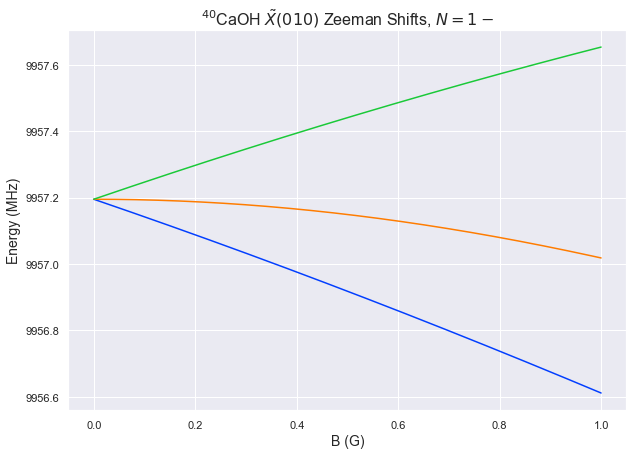

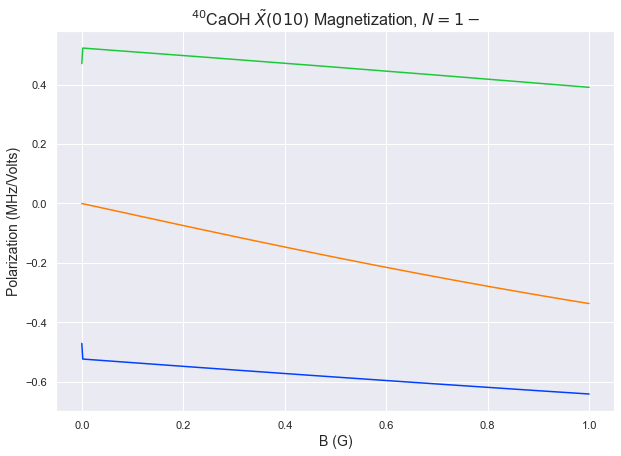

In [174]:
plt.figure(figsize=(10,7))
idx = N1.select_q({'J':0.5,'F':1},parity='-')
for (i,trace) in enumerate(N1.evals_B.T[idx]):
    plt.plot(Bz,trace)
plt.xlabel('B (G)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Zeeman Shifts, $N=1-$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(N1.evals_B.T[idx]):
    grad = np.gradient(trace)/abs(Bz[-1]-Bz[-2])
    plt.plot(Bz,grad)
    print(i,grad[0])
plt.xlabel('B (G)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Magnetization, $N=1-$',fontsize=16);

In [4]:
N1 = MoleculeLevels.initialize_state('CaOH','40','X000',[1],M_values = 'all',I=[0,1/2],S=1/2,round=8,P_values=[1/2])
N2 = MoleculeLevels.initialize_state('CaOH','40','X000',[2],M_values = 'all',I=[0,1/2],S=1/2,round=8,P_values=[1/2])
Bstep = 0.001
Bz = np.arange(0,1+Bstep,Bstep)
Bz[0]=1e-4
Estep = 0.25
Ez = np.arange(0,150+Estep,Estep)
N1.ZeemanMap(Bz,0,plot=False)
N2.ZeemanMap(Bz,0,plot=False)
N1.StarkMap(Ez,1e-4,plot=False)
N2.StarkMap(Ez,1e-4,plot=False)

In [167]:
Trans_B = {}
for _B in Bscan:
    N1.StarkMap(Ez,_B,plot=False)
    N2.StarkMap(Ez,_B,plot=False)
    Trans_B[_B] = {'all': transitions_E(N1,N2,Escan,dipole='abs',Debye=1.465),
                   'x': transitions_E(N1,N2,Escan,dipole='x',Debye=1.465),
                   'z': transitions_E(N1,N2,Escan,dipole='z',Debye=1.465),
                   'x+z': transitions_E(N1,N2,Escan,dipole='x+z',Debye=1.465),
                  }
#output of transitions_E is TDM_E, dE_E, table_E

Using B (G) field of 0.001
0.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
15.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
30.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
45.0
Successfully conve

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
75.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
90.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
120.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
135.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
150.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ t

Using B (G) field of 0.125
0.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
15.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
30.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
45.0
Successfully conve

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
75.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
90.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
120.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
135.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
150.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ t

Using B (G) field of 0.375
0.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
15.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
30.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
45.0
Successfully conve

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
75.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
90.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
120.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
135.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
150.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ t

Using B (G) field of 0.625
0.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
15.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
30.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
45.0
Successfully conve

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
75.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
90.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
120.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
135.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
150.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ t

Using B (G) field of 0.875
0.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
15.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
30.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
45.0
Successfully conve

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
75.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
90.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
120.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
135.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
150.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ t

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
15.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
30.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
45.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

In [5]:
Trans_E = {}
for _E in [0]:
    N1.ZeemanMap(Bz,_E,plot=False)
    N2.ZeemanMap(Bz,_E,plot=False)
    Trans_E[_E] = {'all': transitions_B(N1,N2,Bscan,dipole='abs',Debye=1.465),
                   'x': transitions_B(N1,N2,Bscan,dipole='x',Debye=1.465),
                   'z': transitions_B(N1,N2,Bscan,dipole='z',Debye=1.465),
                   'x+z': transitions_B(N1,N2,Bscan,dipole='x+z',Debye=1.465),
                  }
#output of transitions_B is TDM_B, dE_B, table_B

Using E (V/cm) field of 0
0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.025
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.05
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.076
Successfully co

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.2
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Using E (V/cm) field of 0
0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.025
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted

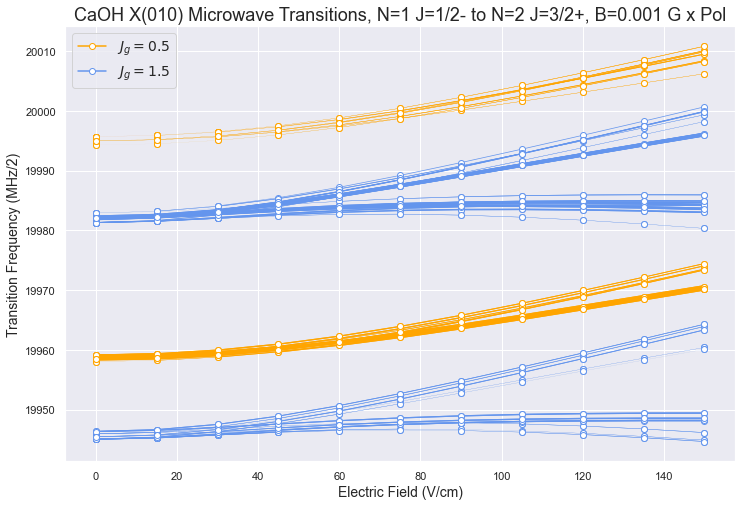

B = 0.001 G

E (V/cm) = 0.0
Pol = x
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=2,M=1)                     19945.066322              -0.1249
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=2)                     19945.066458              -0.1249
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=0)                     19945.066887               0.1530
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=1)                     19945.067023              -0.1530
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=-1)                    19945.067451              -0.1530
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=0)                    19945.067588               0.1530
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=-2)                   19945.068016               0.1249
(N=1-,J=1.5,F=2,M=-2)->(N=2+,J=1.5,F=2,M=-1)                   19945.068152               0

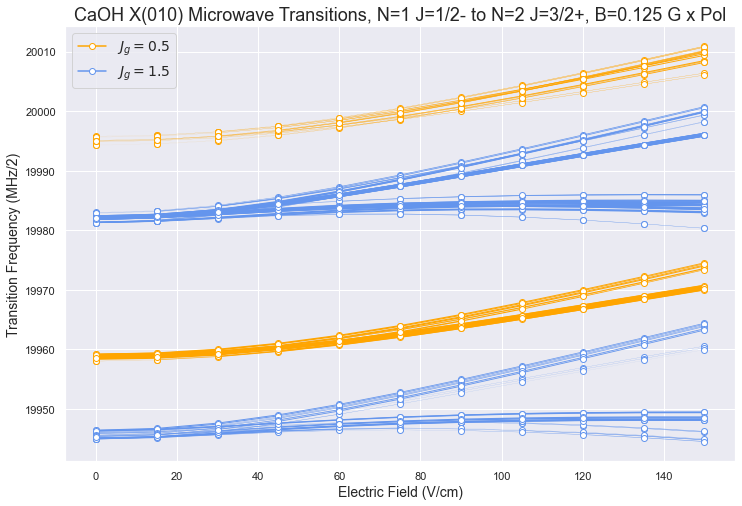

B = 0.125 G

E (V/cm) = 0.0
Pol = x
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=2,M=1)                     19944.952194              -0.1218
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=2)                     19944.968807              -0.1213
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=0)                     19945.021669              -0.1520
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=1)                     19945.038528              -0.1513
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=-1)                    19945.092136              -0.1547
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=0)                    19945.109263               0.1539
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=-2)                   19945.163542               0.1284
(N=1-,J=1.5,F=2,M=-2)->(N=2+,J=1.5,F=2,M=-1)                   19945.180956               0

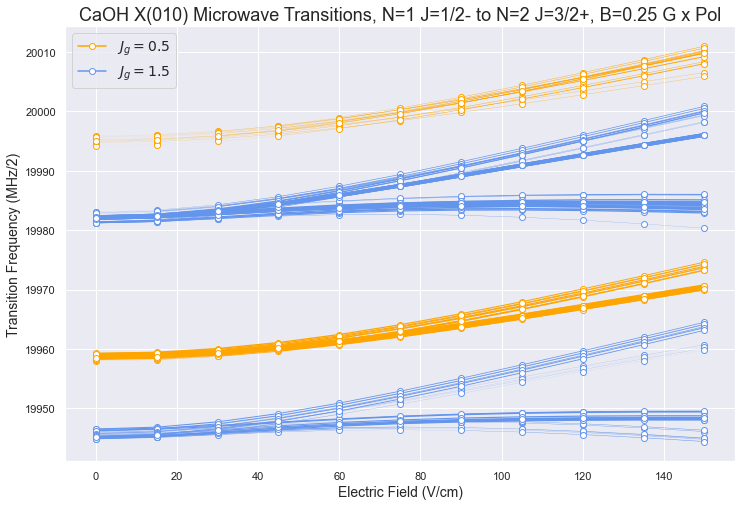

B = 0.25 G

E (V/cm) = 0.0
Pol = x
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=2,M=1)                     19944.835716               0.1184
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=2)                     19944.868203              -0.1177
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=0)                     19944.972523              -0.1510
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=1)                     19945.005905               0.1496
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=-1)                    19945.113339              -0.1564
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=0)                    19945.147810               0.1546
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=1,M=1)                     19945.202217              -0.0819
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=-2)                   19945.257768               0.

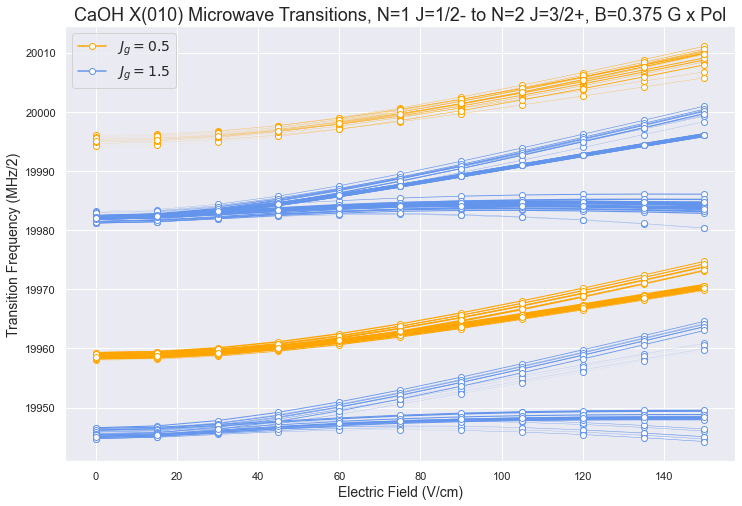

B = 0.375 G

E (V/cm) = 0.0
Pol = x
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=2,M=1)                     19944.717693               0.1145
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=2)                     19944.765382              -0.1139
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=0)                     19944.919787               0.1499
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=1)                     19944.969283               0.1479
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=1,M=1)                     19945.072833              -0.0865
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=-1)                    19945.130971              -0.1581
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=0)                    19945.182964               0.1552
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=1,M=1)                     19945.324423               0

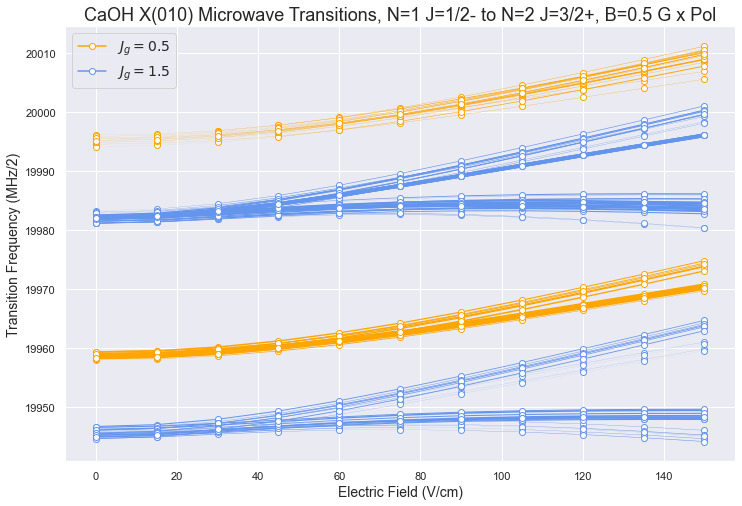

B = 0.5 G

E (V/cm) = 0.0
Pol = x
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=2,M=1)                     19944.598024               0.1103
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=2)                     19944.660307               0.1101
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=0)                     19944.863477              -0.1489
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=1)                     19944.928599               0.1461
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=1,M=1)                     19944.944429              -0.0912
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=-1)                    19945.145160              -0.1598
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=0)                    19945.214827              -0.1556
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=1,M=1)                     19945.275004               0.0

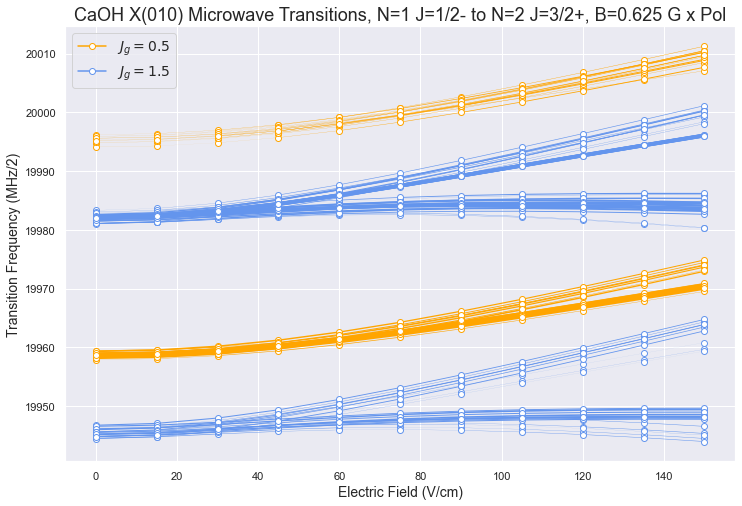

B = 0.625 G

E (V/cm) = 0.0
Pol = x
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=2,M=1)                     19944.476628              -0.1057
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=2)                     19944.552948               0.1062
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=0)                     19944.803635              -0.1479
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=1,M=1)                     19944.817091               0.0958
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=1)                     19944.883824              -0.1443
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=-1)                    19945.156038              -0.1615
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=1,M=1)                     19945.224287              -0.0164
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=1,M=0)                     19945.230464               0

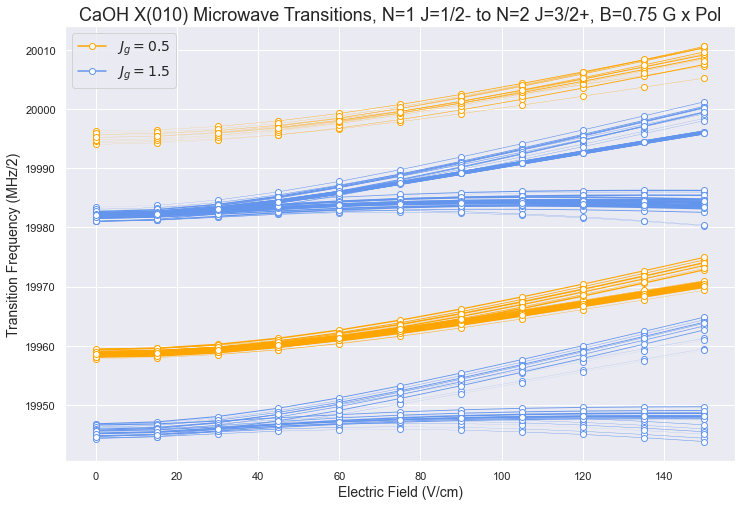

B = 0.75 G

E (V/cm) = 0.0
Pol = x
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=2,M=1)                     19944.353450              -0.1009
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=2)                     19944.443290              -0.1022
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=1,M=1)                     19944.690877               0.1003
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=0)                     19944.740322              -0.1470
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=1)                     19944.834966              -0.1424
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=-1)                    19945.163737               0.1631
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=1,M=1)                     19945.172393              -0.0129
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=1,M=0)                     19945.179917               0.

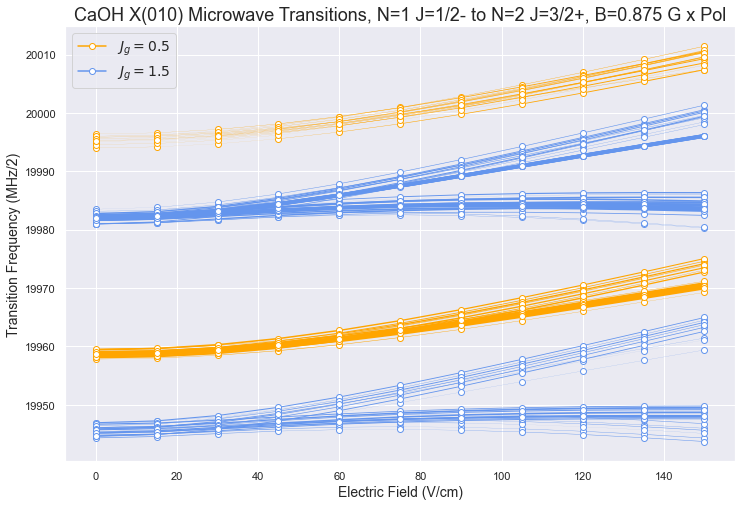

B = 0.875 G

E (V/cm) = 0.0
Pol = x
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=2,M=1)                     19944.228470               0.0958
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=2)                     19944.331329              -0.0982
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=1,M=1)                     19944.565809              -0.1046
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=0)                     19944.673621               0.1462
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=1)                     19944.782078               0.1405
(N=1-,J=1.5,F=1,M=1)->(N=2+,J=1.5,F=2,M=2)                     19945.062893              -0.0740
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=1,M=1)                     19945.119417               0.0094
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=1,M=0)                     19945.127834              -0

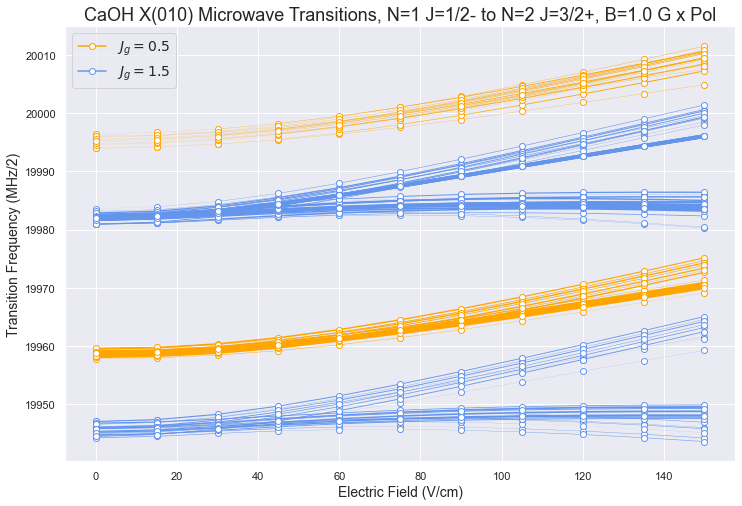

B = 1.0 G

E (V/cm) = 0.0
Pol = x
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=2,M=1)                     19944.101708              -0.0906
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=2)                     19944.217081               0.0941
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=1,M=1)                     19944.441874               0.1086
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=0)                     19944.603634              -0.1455
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=1)                     19944.725255              -0.1384
(N=1-,J=1.5,F=1,M=1)->(N=2+,J=1.5,F=2,M=2)                     19944.939024               0.0757
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=1,M=1)                     19945.065421              -0.0059
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=1,M=0)                     19945.074139               0.0

In [169]:
pol = 'z'
print_bool = True
for B in Bscan:
    N1.eigensystem(0,1e-4)
    N2.eigensystem(0,1e-4)
    g1 = N1.select_q({'N':1,'J':0.5},parity='-')
    e1 = N2.select_q({'N':2},parity='+')
    g2 = N1.select_q({'N':1,'J':1.5},parity='-')
    e2 = N2.select_q({'N':2},parity='+')
    g3 = N1.select_q({'N':1},parity='-')
    e3 = N2.select_q({'N':2},parity='+')
    fig,a = plt.subplots(figsize=(12,8))
    TDM_E,dE_E,t_str_E = Trans_B[B][pol]
    
#     g = N1.select_q({'N':1,'J':0.5,'F':0},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
#     g = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,0,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
    plot_E(Escan,TDM_E,dE_E,g_idx=g2,e_idx=e2,linescale=10,figure=fig,color='cornflowerblue',marker='o',mfc='white')
    plot_E(Escan,TDM_E,dE_E,g_idx=g1,e_idx=e1,linescale=10,figure=fig,color='orange',marker='o',mfc='white')
    colors = ['orange','cornflowerblue']#,'pink']
    mark = ['o','o']#,None]
    mf = ['white','white']#,'white']
    lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
    labels = [r'$J_g=0.5$',r'$J_g=1.5$']#,r'$M_e\neq0$']
    plt.legend(lines, labels,loc='best',fontsize=14)
    plt.title('CaOH X(010) Microwave Transitions, N=1 J=1/2- to N=2 J=3/2+, B={} G {} Pol'.format(B,pol),fontsize=18)
    plt.show()
    if print_bool:
        print('B = {} G'.format(B))
        table = print_table_E(Escan,TDM_E,dE_E,t_str_E,g3,e3,thresh = 0.001,cut=True,dipole=pol)

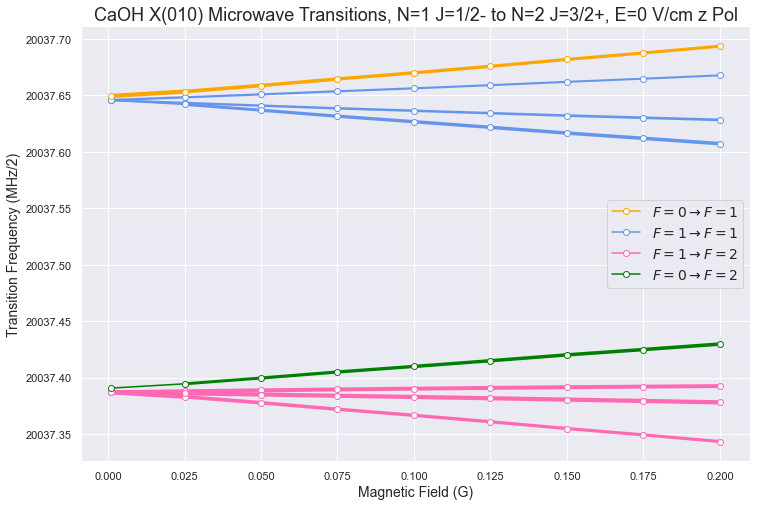

E = 0 V/cm

B (G) = 0.001
Pol = z
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=0.5,F=1,M=-1)->(N=2+,J=1.5,F=2,M=-1)                   40074.773927               0.6005
(N=1-,J=0.5,F=1,M=0)->(N=2+,J=1.5,F=2,M=0)                     40074.773976              -0.6921
(N=1-,J=0.5,F=1,M=1)->(N=2+,J=1.5,F=2,M=1)                     40074.774075              -0.6002
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=2,M=0)                     40074.781511               0.0401
(N=1-,J=0.5,F=1,M=1)->(N=2+,J=1.5,F=1,M=1)                     40075.291232               0.3388
(N=1-,J=0.5,F=1,M=0)->(N=2+,J=1.5,F=1,M=0)                     40075.291407               0.0399
(N=1-,J=0.5,F=1,M=-1)->(N=2+,J=1.5,F=1,M=-1)                   40075.291630              -0.3383
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=1,M=0)                     40075.298942               0.6

In [7]:
pol = 'z'
print_bool = True
for E in [0]:
    N1.eigensystem(E,1e-4)
    N2.eigensystem(E,1e-4)
    g1 = N1.select_q({'N':1,'J':0.5,'F':[0]},parity='-')
    e1 = N2.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
    g2 = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
    e2 = N2.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
    g4 = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
    e4 = N2.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
    g5 = N1.select_q({'N':1,'J':0.5,'F':[0]},parity='-')
    e5 = N2.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
    g3 = N1.select_q({'N':1,'J':0.5,'F':[0,1]},parity='-')
    e3 = N2.select_q({'N':2,'J':1.5,'F':[1,2]},parity='+')
    fig,a = plt.subplots(figsize=(12,8))
    TDM_B,dE_B,t_str_B = Trans_E[E][pol]
    
#     g = N1.select_q({'N':1,'J':0.5,'F':0},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
#     g = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,0,1,2]},parity='+')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g4,e_idx=e4,linescale=10,figure=fig,color='hotpink',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g5,e_idx=e5,linescale=10,thresh=0.001,figure=fig,color='green',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g2,e_idx=e2,linescale=10,figure=fig,color='cornflowerblue',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g1,e_idx=e1,linescale=10,figure=fig,color='orange',marker='o',mfc='white')
    colors = ['orange','cornflowerblue','hotpink','green']
    mark = ['o','o','o','o']
    mf = ['white','white','white','white']
    lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
    labels = [r'$F=0\rightarrow F=1$',r'$F=1\rightarrow F=1$',r'$F=1\rightarrow F=2$',r'$F=0\rightarrow F=2$']#,r'$M_e\neq0$']
    plt.legend(lines, labels,loc='best',fontsize=14)
    plt.title('CaOH X(010) Microwave Transitions, N=1 J=1/2- to N=2 J=3/2+, E={} V/cm {} Pol'.format(E,pol),fontsize=18)
    plt.show()
    if print_bool:
        print('E = {} V/cm'.format(E))
        table = print_table_B(Bscan,TDM_B,dE_B*2,t_str_B,g3,e3,thresh = 0.001,cut=True,dipole=pol)

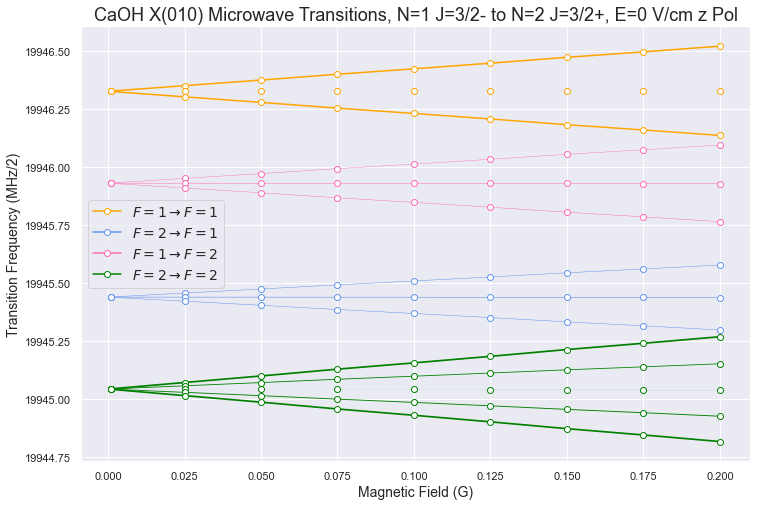

E = 0 V/cm

B (G) = 0.001
Pol = z
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=2,M=2)                     19945.041119              -0.2498
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=1)                     19945.041684              -0.1250
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=-1)                   19945.042813              -0.1249
(N=1-,J=1.5,F=2,M=-2)->(N=2+,J=1.5,F=2,M=-2)                   19945.043377              -0.2498
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=1,M=1)                     19945.437799              -0.0732
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=1,M=0)                     19945.438500              -0.0846
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=1,M=-1)                   19945.439201              -0.0733
(N=1-,J=1.5,F=1,M=1)->(N=2+,J=1.5,F=2,M=1)                     19945.928696              -0.0

In [14]:
pol = 'z'
print_bool = True
for E in [0]:
    N1.eigensystem(E,1e-4)
    N2.eigensystem(E,1e-4)
    g1 = N1.select_q({'N':1,'J':1.5,'F':[1]},parity='-')
    e1 = N2.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
    g2 = N1.select_q({'N':1,'J':1.5,'F':[2]},parity='-')
    e2 = N2.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
    g4 = N1.select_q({'N':1,'J':1.5,'F':[1]},parity='-')
    e4 = N2.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
    g5 = N1.select_q({'N':1,'J':1.5,'F':[2]},parity='-')
    e5 = N2.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
    g3 = N1.select_q({'N':1,'J':1.5,'F':[1,2]},parity='-')
    e3 = N2.select_q({'N':2,'J':1.5,'F':[1,2]},parity='+')
    fig,a = plt.subplots(figsize=(12,8))
    TDM_B,dE_B,t_str_B = Trans_E[E][pol]
    
#     g = N1.select_q({'N':1,'J':0.5,'F':0},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
#     g = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,0,1,2]},parity='+')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g4,e_idx=e4,linescale=10,figure=fig,color='hotpink',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g5,e_idx=e5,linescale=10,figure=fig,color='green',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g2,e_idx=e2,linescale=10,figure=fig,color='cornflowerblue',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g1,e_idx=e1,linescale=10,figure=fig,color='orange',marker='o',mfc='white')
    colors = ['orange','cornflowerblue','hotpink','green']
    mark = ['o','o','o','o']
    mf = ['white','white','white','white']
    lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
    labels = [r'$F=1\rightarrow F=1$',r'$F=2\rightarrow F=1$',r'$F=1\rightarrow F=2$',r'$F=2\rightarrow F=2$']#,r'$M_e\neq0$']
    plt.legend(lines, labels,loc='best',fontsize=14)
    plt.title('CaOH X(010) Microwave Transitions, N=1 J=3/2- to N=2 J=3/2+, E={} V/cm {} Pol'.format(E,pol),fontsize=18)
    plt.show()
    if print_bool:
        print('E = {} V/cm'.format(E))
        table = print_table_B(Bscan,TDM_B,dE_B,t_str_B,g3,e3,thresh = 0.001,cut=True,dipole=pol)

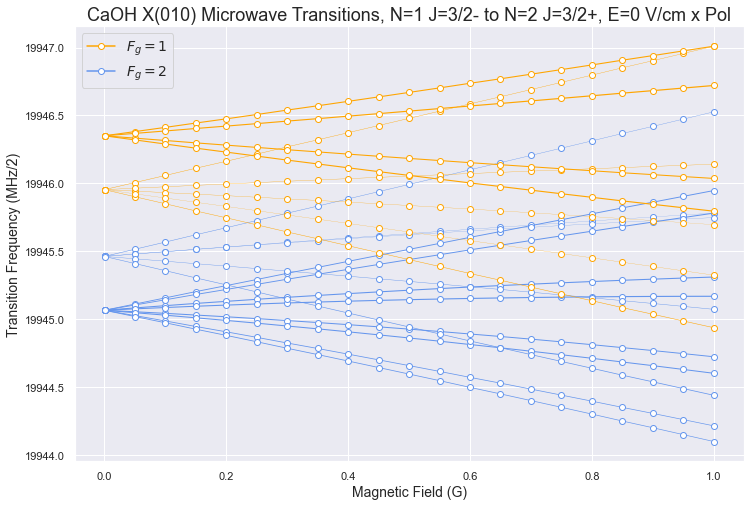

E = 0 V/cm

B (G) = 0.001
Pol = x
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=2,M=1)                     19945.066322              -0.1249
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=2)                     19945.066458              -0.1249
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=0)                     19945.066887               0.1530
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=1)                     19945.067023              -0.1530
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=-1)                    19945.067451              -0.1530
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=0)                    19945.067588               0.1530
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=-2)                   19945.068016               0.1249
(N=1-,J=1.5,F=2,M=-2)->(N=2+,J=1.5,F=2,M=-1)                   19945.068152               0.1

In [125]:
pol = 'x'
print_bool = True
for E in [0]:
    N1.eigensystem(E,1e-4)
    N2.eigensystem(E,1e-4)
    g1 = N1.select_q({'N':1,'J':1.5,'F':[1]},parity='-')
    e1 = N2.select_q({'N':2,'J':1.5},parity='+')
    g2 = N1.select_q({'N':1,'J':1.5,'F':[2]},parity='-')
    e2 = N2.select_q({'N':2,'J':1.5},parity='+')
    g3 = N1.select_q({'N':1,'J':1.5},parity='-')
    e3 = N2.select_q({'N':2,'J':1.5},parity='+')
    fig,a = plt.subplots(figsize=(12,8))
    TDM_B,dE_B,t_str_B = Trans_E[E][pol]
    
#     g = N1.select_q({'N':1,'J':0.5,'F':0},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
#     g = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,0,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g2,e_idx=e2,linescale=10,figure=fig,color='cornflowerblue',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g1,e_idx=e1,linescale=10,figure=fig,color='orange',marker='o',mfc='white')
    colors = ['orange','cornflowerblue']#,'pink']
    mark = ['o','o']#,None]
    mf = ['white','white']#,'white']
    lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
    labels = [r'$F_g=1$',r'$F_g=2$']#,r'$M_e\neq0$']
    plt.legend(lines, labels,loc='best',fontsize=14)
    plt.title('CaOH X(010) Microwave Transitions, N=1 J=3/2- to N=2 J=3/2+, E={} V/cm {} Pol'.format(E,pol),fontsize=18)
    plt.show()
    if print_bool:
        print('E = {} V/cm'.format(E))
        table = print_table_B(Bscan,TDM_B,dE_B,t_str_B,g3,e3,thresh = 0.001,cut=True,dipole=pol)

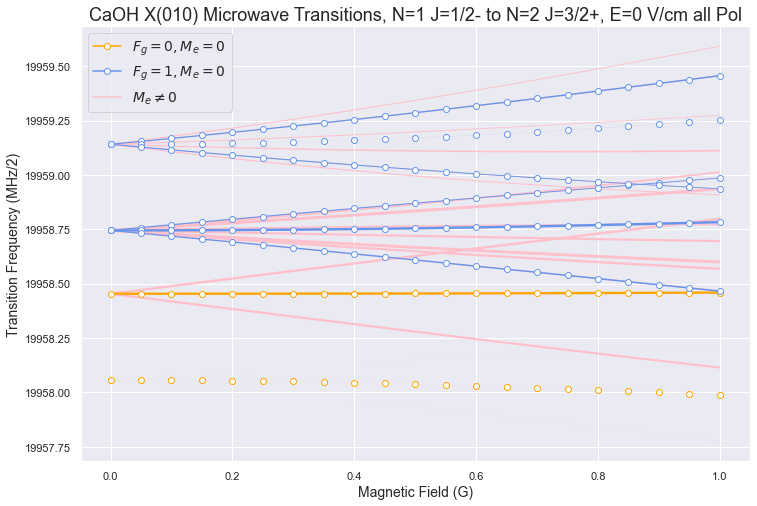

E= 0


NameError: name 'print_table' is not defined

In [119]:
pol = 'all'
print_bool = True
for E in [0]:
    N1.eigensystem(E,1e-4)
    N2.eigensystem(E,1e-4)
    g1 = N1.select_q({'N':1,'J':0.5,'F':[0]},parity='-')
    e1 = N2.select_q({'N':2,'J':1.5,'M':0},parity='+')
    g2 = N1.select_q({'N':1,'J':0.5,'F':1},parity='-')
    e2 = N2.select_q({'N':2,'J':1.5,'M':0},parity='+')
    g3 = N1.select_q({'N':1,'J':0.5},parity='-')
    e3 = N2.select_q({'N':2,'J':1.5},parity='+')
    fig,a = plt.subplots(figsize=(12,8))
    TDM_B,dE_B,t_str_B = Trans_E[E][pol]
    
    g = N1.select_q({'N':1,'J':0.5,'F':0},parity='-')
    e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,1,2]},parity='+')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
    g = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
    e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,0,1,2]},parity='+')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
    
    plot_B(Bscan,TDM_B,dE_B,g_idx=g1,e_idx=e1,linescale=10,figure=fig,color='orange',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g2,e_idx=e2,linescale=10,figure=fig,color='cornflowerblue',marker='o',mfc='white')
    colors = ['orange','cornflowerblue','pink']
    mark = ['o','o',None]
    mf = ['white','white','white']
    lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
    labels = [r'$F_g=0, M_e=0$',r'$F_g=1, M_e=0$',r'$M_e\neq0$']
    plt.legend(lines, labels,loc='best',fontsize=14)
    plt.title('CaOH X(010) Microwave Transitions, N=1 J=1/2- to N=2 J=3/2+, E={} V/cm {} Pol'.format(E,pol),fontsize=18)
    plt.show()
    if print_bool:
        print('E=',E)
        table = print_table(Bscan,TDM_B,dE_B,t_str_B,g3,e3,thresh = 0.001,cut=True,dipole=pol)

In [275]:
N1.write_state(3)

E = 9958.569766667135 MHz

 0.7071067808654263 |K=-1,N=1,J=0.5,F=0.0,M=0.0> 

 -0.7071067808653126 |K=1,N=1,J=0.5,F=0.0,M=0.0> 

 -1.1154576882391881e-17 |K=-1,N=1,J=0.5,F=1.0,M=-1.0> 

 8.544868371901382e-18 |K=1,N=1,J=0.5,F=1.0,M=-1.0> 

 -2.07526478949049e-05 |K=-1,N=1,J=0.5,F=1.0,M=0.0> 

 2.0752647894908524e-05 |K=1,N=1,J=0.5,F=1.0,M=0.0> 

 -4.5145966869495714e-23 |K=-1,N=1,J=0.5,F=1.0,M=1.0> 

 4.8449842558306146e-23 |K=1,N=1,J=0.5,F=1.0,M=1.0> 

 4.895194127386319e-19 |K=-1,N=1,J=1.5,F=1.0,M=-1.0> 

 -4.451839384081833e-19 |K=1,N=1,J=1.5,F=1.0,M=-1.0> 

 4.851996047073014e-06 |K=-1,N=1,J=1.5,F=1.0,M=0.0> 

 -4.851996047073296e-06 |K=1,N=1,J=1.5,F=1.0,M=0.0> 

 2.192253315551256e-24 |K=-1,N=1,J=1.5,F=1.0,M=1.0> 

 -2.2484058116120987e-24 |K=1,N=1,J=1.5,F=1.0,M=1.0> 

 1.0627447553439413e-41 |K=-1,N=1,J=1.5,F=2.0,M=-2.0> 

 -3.90682011853759e-42 |K=1,N=1,J=1.5,F=2.0,M=-2.0> 

 -4.626600654443192e-23 |K=-1,N=1,J=1.5,F=2.0,M=-1.0> 

 4.192708680799953e-23 |K=1,N=1,J=1.5,F=2.0,M=-1.

(10000,)
(10000, 1, 2)
(9999, 1, 2)
(9999,)
(9999, 2, 2)
[ 1.       1.00126  1.00251 ... 13.5626  13.56386 13.56511]


<Figure size 432x288 with 0 Axes>

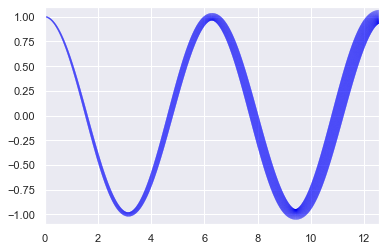

In [192]:
import numpy as np
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
x = np.linspace(0,4*np.pi,10000)
y = np.cos(x)
lwidths=1+x[:-1]
print(x.shape)
points = np.array([x, y]).T.reshape(-1, 1, 2)
print(points.shape)
print(points[:-1].shape)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
print(lwidths.shape)
print(segments.shape)
lc = LineCollection(segments, linewidths=lwidths,color='blue')
plt.figure()
fig,a = plt.subplots()
a.add_collection(lc)
a.set_xlim(0,4*np.pi)
a.set_ylim(-1.1,1.1)
# plt.plot(x,y*0.5)
print(lwidths)

In [190]:
x = Bscan
y = dE_B[:,1,1]
print(y.shape)
print(x.shape)
lwidth = TDM_B[:,1,1]/1.465
points = np.array([x, y]).T.reshape(-1, 1, 2)
print(np.array([x,y]).shape)
print(points.shape)
print(points[1:].shape)
segments = np.concatenate([points, points], axis=1)
print(lwidth.shape)
print(segments.shape)

(11,)
(11,)
(2, 11)
(11, 1, 2)
(10, 1, 2)
(11,)
(11, 2, 2)


In [159]:
points = np.array([x, y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
segments

array([[[ 0.     ,  1.     ],
        [ 0.00126,  1.     ]],

       [[ 0.00126,  1.     ],
        [ 0.00251,  1.     ]],

       [[ 0.00251,  1.     ],
        [ 0.00377,  0.99999]],

       ...,

       [[12.5626 ,  0.99999],
        [12.56386,  1.     ]],

       [[12.56386,  1.     ],
        [12.56511,  1.     ]],

       [[12.56511,  1.     ],
        [12.56637,  1.     ]]])

In [103]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
segments[2]

array([[0.00251, 1.     ],
       [0.00377, 0.99999]])

In [101]:
np.array([x,y]).T

array([[ 0.     ,  1.     ],
       [ 0.00126,  1.     ],
       [ 0.00251,  1.     ],
       ...,
       [12.56386,  1.     ],
       [12.56511,  1.     ],
       [12.56637,  1.     ]])

In [100]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
points

array([[[ 0.     ,  1.     ]],

       [[ 0.00126,  1.     ]],

       [[ 0.00251,  1.     ]],

       ...,

       [[12.56386,  1.     ]],

       [[12.56511,  1.     ]],

       [[12.56637,  1.     ]]])

In [ ]:
g_idx=None,e_idx=None,thresh = 0.001,title=None,figure=None,**kwargs)

In [340]:
x=np.zeros((21,20,40))

In [348]:
x[:,1,39].shape

(21,)

In [337]:
x=np.zeros((20,40))

In [339]:
x[

IndexError: index 30 is out of bounds for axis 0 with size 20

In [268]:
Bscan = np.linspace(0,50,21)
Bscan[0]=1e-3
print(Bscan)

[ 0.001  2.5    5.     7.5   10.    12.5   15.    17.5   20.    22.5
 25.    27.5   30.    32.5   35.    37.5   40.    42.5   45.    47.5
 50.   ]


0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ t

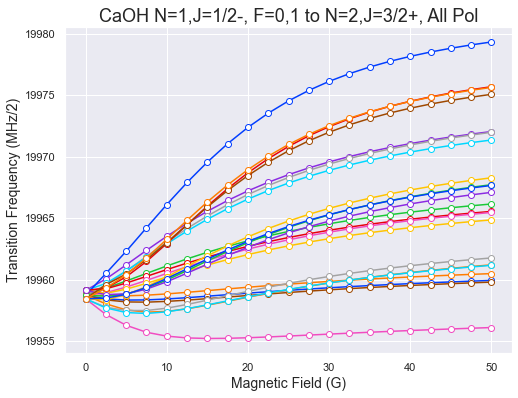

In [273]:
Bl01all,table01all=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0,1]},{'N':2,'J':1.5},Bscan,dipole='abs',plot=False)
Bl01allT = plot_B_tracking(Bscan,Bl01all,dipole='abs',reorder_missing=True,title='CaOH N=1,J=1/2-, F=0,1 to N=2,J=3/2+, All Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ t

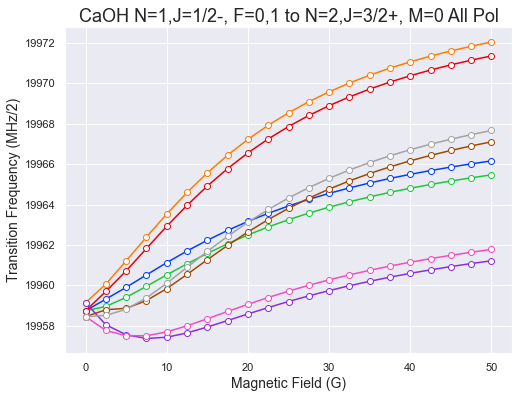

In [274]:
Bltargall,tabletargall=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0,1]},{'N':2,'J':1.5,'M':[0]},Bscan,dipole='abs',plot=False)
BltargallT = plot_B_tracking(Bscan,Bltargall,dipole='abs',reorder_missing=True,title='CaOH N=1,J=1/2-, F=0,1 to N=2,J=3/2+, M=0 All Pol')

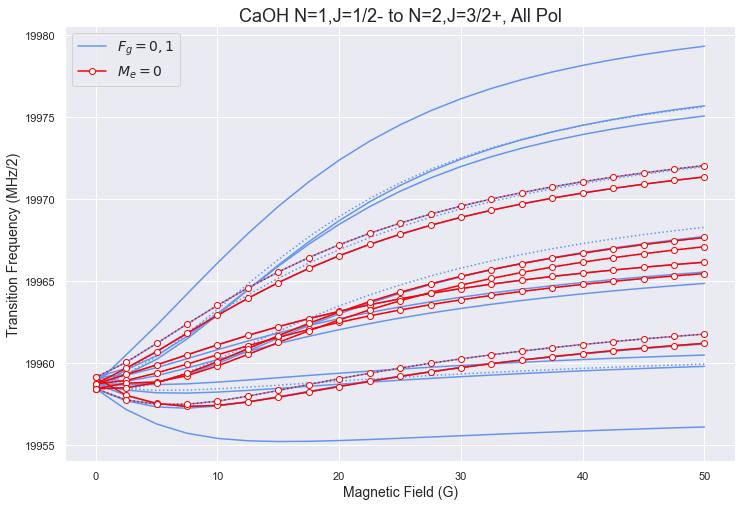

In [329]:
plt.figure(1,figsize=(12,8))
# plot_B_tracking(Bscan,Bl01all,table01all,dipole='all',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, All Pol',figure=1,color='cornflowerblue',marker=None)
plot_B_tracking(Bscan,Bltargall,tabletargall,dipole='all',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, All Pol',figure=1,color='red')
colors = ['cornflowerblue','red']
mark = [None,'o']
mf = [None,'white']
lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
labels = [r'$F_g=0,1$',r'$M_e=0$']
plt.legend(lines, labels,loc='best',fontsize=14)
plt.show()

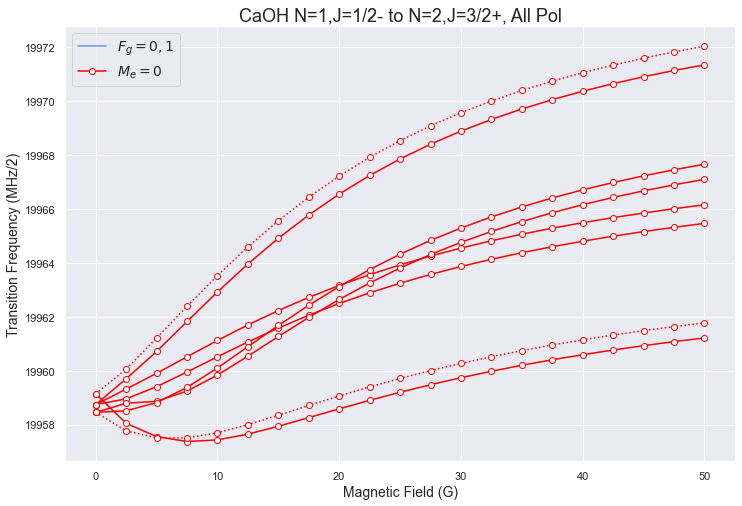

In [330]:
plt.figure(1,figsize=(12,8))
# plot_B_tracking(Bscan,Bl01all,table01all,dipole='all',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, All Pol',figure=1,color='cornflowerblue',marker=None)
plot_B_tracking(Bscan,Bltargall,tabletargall,dipole='all',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, All Pol',figure=1,color='red')
colors = ['cornflowerblue','red']
mark = [None,'o']
mf = [None,'white']
lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
labels = [r'$F_g=0,1$',r'$M_e=0$']
plt.legend(lines, labels,loc='best',fontsize=14)
plt.show()

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ t

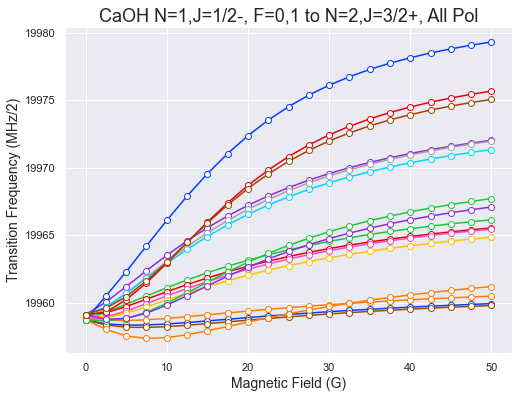

In [269]:
Bl1all,table1all=all_B_tracking(X010,{'N':1,'J':0.5,'F':[1]},{'N':2,'J':1.5},Bscan,dipole='abs',plot=False)
Bl1allT = plot_B_tracking(Bscan,Bl1all,dipole='abs',reorder_missing=True,title='CaOH N=1,J=1/2-, F=1 to N=2,J=3/2+, All Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ t

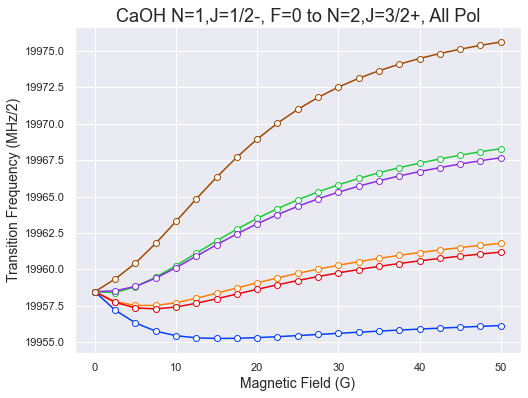

In [270]:
Bl0all,table0all=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0]},{'N':2,'J':1.5},Bscan,dipole='abs',plot=False)
Bl0allT = plot_B_tracking(Bscan,Bl0all,dipole='abs',reorder_missing=True,title='CaOH N=1,J=1/2-, F=0 to N=2,J=3/2+, All Pol')

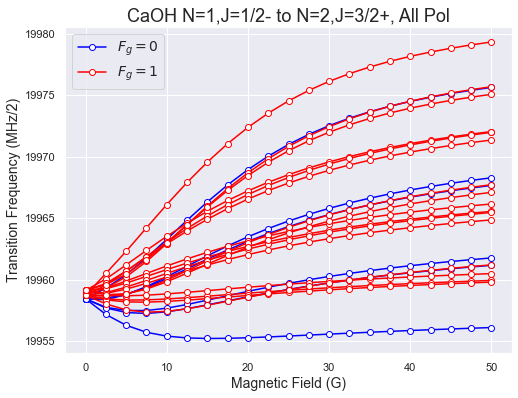

In [272]:
plt.figure(1,figsize=(8,6))
plot_B_tracking(Bscan,Bl0all,dipole='all',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, All Pol',figure=1,color='blue')
plot_B_tracking(Bscan,Bl1all,dipole='all',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, All Pol',figure=1,color='red')
colors = ['blue','red']
lines = [plt.Line2D([0], [0], color=c, marker='o',mfc='white') for c in colors]
labels = [r'$F_g=0$',r'$F_g=1$']
plt.legend(lines, labels,loc='best',fontsize=14)
plt.show()

In [183]:
Bl1z,table1z=all_B_tracking(X010,{'N':1,'J':0.5,'F':[1]},{'N':2,'J':1.5},Bscan,dipole='z',plot=False)
Bl1zT = plot_B_tracking(Bscan,Bl1z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2-, F=1 to N=2,J=3/2+, Z Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
12.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
15.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
17.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ

B (G) = 0.001
Pol = 

NameError: name 'Bvals' is not defined

Number of lines: 6
Number of lines: 6
Number of lines: 6
Number of lines: 6
Number of lines: 6
Number of lines: 6
Number of lines: 6
Number of lines: 6
Number of lines: 6


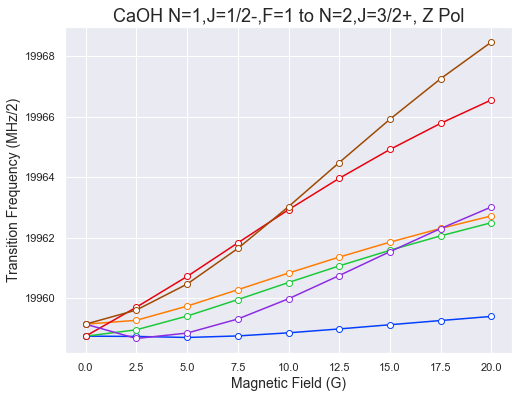

In [193]:
Bl1zT = plot_B_tracking(Bscan,Bl1z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2-,F=1 to N=2,J=3/2+, Z Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from 

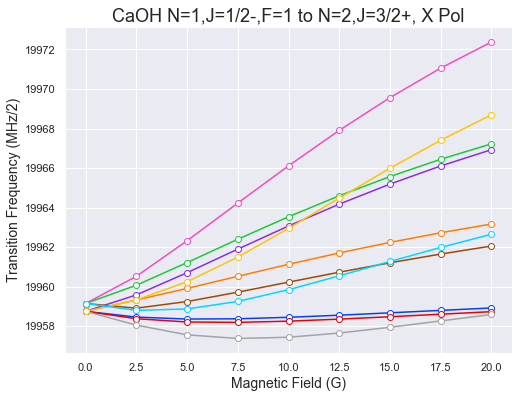

In [196]:
Bl1x,table1x=all_B_tracking(X010,{'N':1,'J':0.5,'F':[1]},{'N':2,'J':1.5},Bscan,dipole='x',plot=False)
Bl1xT = plot_B_tracking(Bscan,Bl1x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2-,F=1 to N=2,J=3/2+, X Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
12.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
15.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
17.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ

B (G) = 0.001
Pol = 

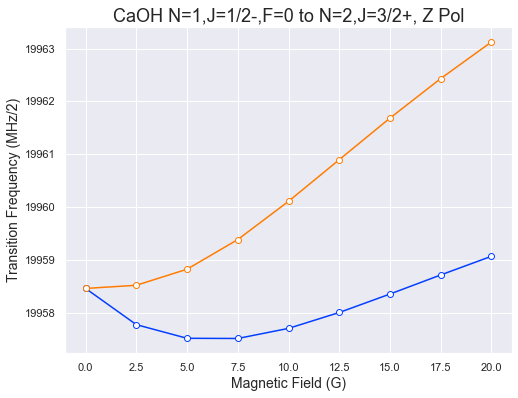

In [198]:
Bl0z,table0z=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0]},{'N':2,'J':1.5},Bscan,dipole='z',plot=False)
Bl0zT = plot_B_tracking(Bscan,Bl0z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2-,F=0 to N=2,J=3/2+, Z Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from 

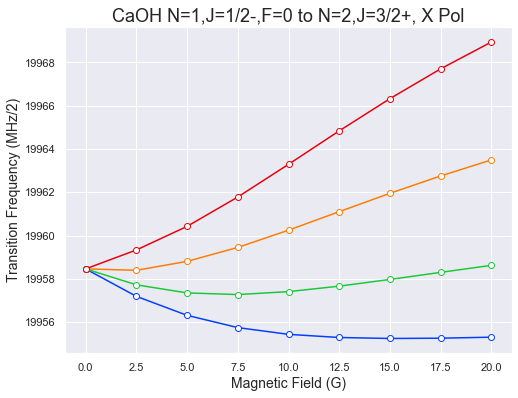

In [197]:
Bl0x,table0x=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0]},{'N':2,'J':1.5},Bscan,dipole='x',plot=False)
Bl0xT = plot_B_tracking(Bscan,Bl0x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2-,F=0 to N=2,J=3/2+, X Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
12.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
15.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
17.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ

B (G) = 0.001
Pol = 

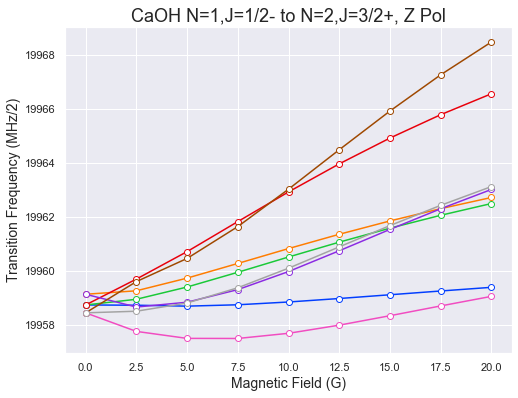

In [201]:
Bl01z,table01z=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0,1]},{'N':2,'J':1.5},Bscan,dipole='z',plot=False)
Bl01zT = plot_B_tracking(Bscan,Bl01z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from 

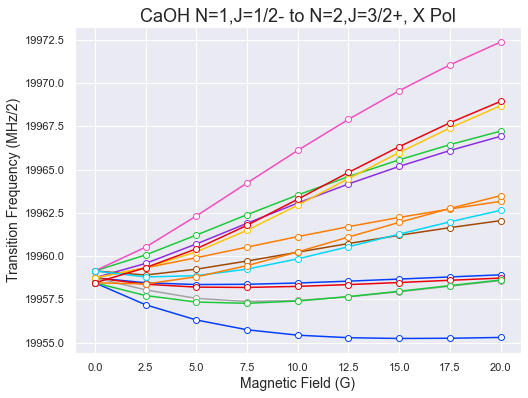

In [202]:
Bl01x,table01x=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0,1]},{'N':2,'J':1.5},Bscan,dipole='x',plot=False)
Bl01xT = plot_B_tracking(Bscan,Bl01x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, X Pol')

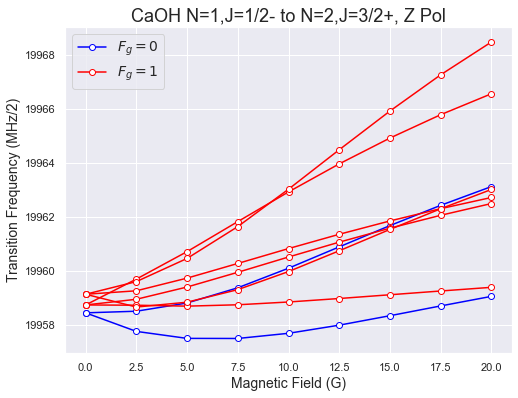

In [216]:
plt.figure(1,figsize=(8,6))
plot_B_tracking(Bscan,Bl0z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol',figure=1,color='blue')
plot_B_tracking(Bscan,Bl1z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol',figure=1,color='red')
colors = ['blue','red']
lines = [plt.Line2D([0], [0], color=c, marker='o',mfc='white') for c in colors]
labels = [r'$F_g=0$',r'$F_g=1$']
plt.legend(lines, labels,loc='best',fontsize=14)
plt.show()

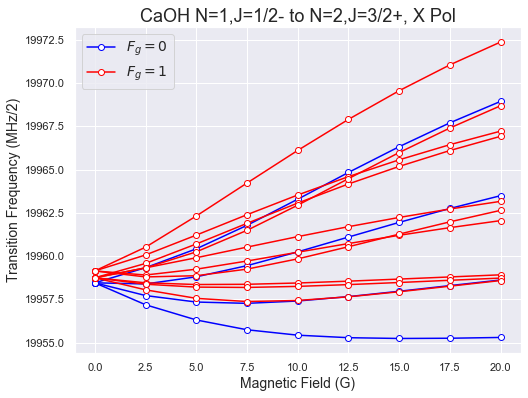

In [217]:
plt.figure(1,figsize=(8,6))
plot_B_tracking(Bscan,Bl0x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, X Pol',figure=1,color='blue')
plot_B_tracking(Bscan,Bl1x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, X Pol',figure=1,color='red')
colors = ['blue','red']
lines = [plt.Line2D([0], [0], color=c, marker='o',mfc='white') for c in colors]
labels = [r'$F_g=0$',r'$F_g=1$']
plt.legend(lines, labels,loc='best',fontsize=14)
plt.show()

In [226]:
Bfine = np.arange(0,2+0.1,0.1)
Bfine[0] = 0.001

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.1
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.2
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.30000000000000004
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.4
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.6000000000000001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.7000000000000001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.8
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvect

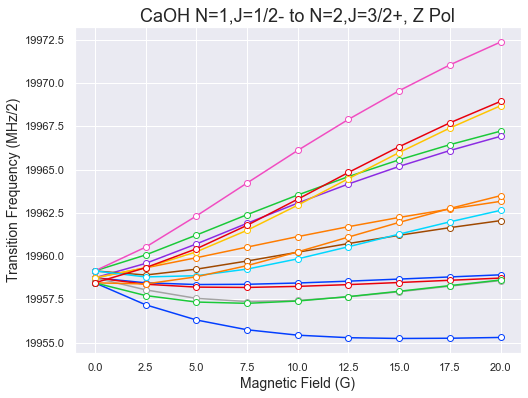

In [229]:
Bf0z,tablef0x=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0]},{'N':2,'J':1.5},Bfine,dipole='z',plot=False)
Bf0zT = plot_B_tracking(Bfine,Bf01x,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol')

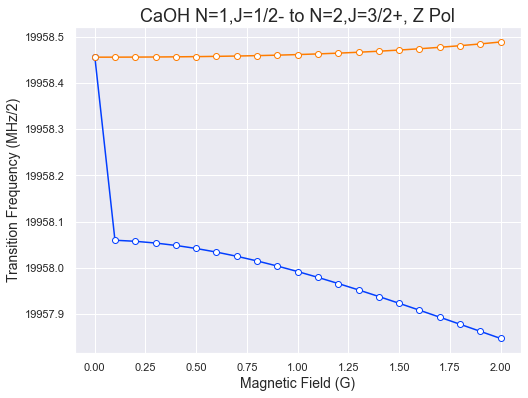

In [233]:
Bf0zT = plot_B_tracking(Bfine,Bf0z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.1
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.2
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.30000000000000004
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.4
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.6000000000000001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.7000000000000001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.8
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvect

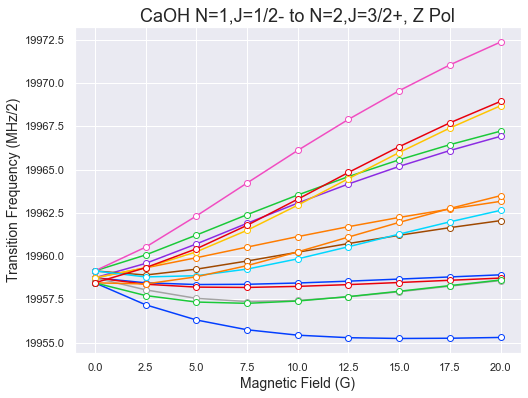

In [230]:
Bf1z,tablef1x=all_B_tracking(X010,{'N':1,'J':0.5,'F':[1]},{'N':2,'J':1.5},Bfine,dipole='z',plot=False)
Bf1zT = plot_B_tracking(Bfine,Bf1z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol')

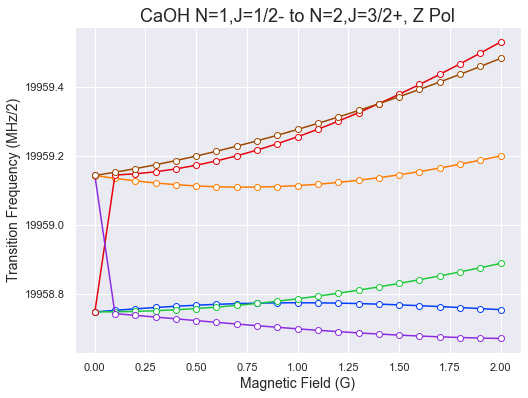

In [234]:
Bf1zT = plot_B_tracking(Bfine,Bf1z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol')

In [ ]:
plt.figure(1,figsize=(8,6))
plot_B_tracking(Bscan,Bl0x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, X Pol',figure=1,color='blue')
plot_B_tracking(Bscan,Bl1x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, X Pol',figure=1,color='red')
colors = ['blue','red']
lines = [plt.Line2D([0], [0], color=c, marker='o',mfc='white') for c in colors]
labels = [r'$F_g=0$',r'$F_g=1$']
plt.legend(lines, labels,loc='best',fontsize=14)
plt.show()

In [96]:
header = ['Transition','Estimated Frequency (MHz/2)','Dipole Moment (D)']
for i in range(len(Bscan)):
    print('\nB (G) =',Bscan[i])
    print(tabulate(B_tables[i],headers=header,floatfmt=('','.6f','.3f')))


B (G) = 0.001
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=1,M=1))                    19958.456081               -0.423
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=1,M=-1))                   19958.456781               -0.423

B (G) = 2.0
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=2,M=1))                    19957.390325               -0.051
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=1,M=1))                    19957.836587               -0.349
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=2,M=-1))                   19958.333572                0.014
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=1,M=-1))                   19959.146777                0.475

B

In [104]:
for B in B_lines:
    print(len(B))

In [105]:
Bh = Bscan[1:]
Blh = B_lines[1:]
BlhT = list(zip(*Blh))

In [106]:
for line in BlhT:
    plt.plot(Bh,line,marker='o')

In [107]:
for x,y in zip(Bscan,B_lines):
    plt.scatter([x] * len(y), y)

In [108]:
B_lines

[]

In [99]:
def all_B_tracking(state,g_q,e_q,Bvals,dipole='z'):
    B_lines,B_tables = track_transition_B(state,g_q,state,e_q,Bvals,dipole)
    header = ['Transition','Estimated Frequency (MHz/2)','Dipole Moment (D)']
    for i in range(len(Bvals)):
        print('\nB (G) =',Bvals[i])
        print(tabulate(B_tables[i],headers=header,floatfmt=('','.6f','.3f')))
    print()
    for B in B_lines:
        print('Number of lines:',len(B))
    BT = list(zip(*B_lines))
    plt.figure(figsize=(10,10))
    for line in BT:
        plt.plot(Bvals,line,marker='o',mfc='white')
    plt.xlabel('Magnetic Field (G)')
    plt.ylabel('Transition Frequency (MHz/2)')
    plt.title('CaOH Microwave Transitions')
    return BT, B_tables

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
4.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
6.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
8.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
12.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
14.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
16.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
18.0
Successfully conv

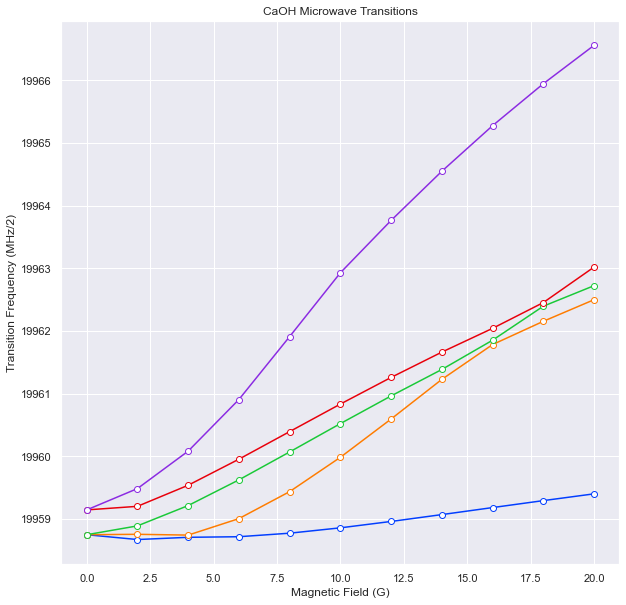

In [92]:
all_B_tracking(X010,{'N':1,'J':0.5,'F':[1]},{'N':2,'J':1.5},Bscan,dipole='z')

In [77]:
B_lines,B_tables = track_transition_B(X010,{'N':1,'J':0.5,'F':[1]},X010,{'N':2,'J':1.5},Bscan,dipole='z')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
4.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
6.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
8.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from b

In [78]:
header = ['Transition','Estimated Frequency (MHz/2)','Dipole Moment (D)']
for i in range(len(Bscan)):
    print('\nB (G) =',Bscan[i])
    print(tabulate(B_tables[i],headers=header,floatfmt=('','.6f','.3f')))


B (G) = 0.001
Transition                                       Estimated Frequency (MHz/2)    Dipole Moment (D)
---------------------------------------------  -----------------------------  -------------------
(N=1-,J=0.5,F=1,M=-1)->(N=2+,J=1.5,F=2,M=0))                    19958.747594                0.213
(N=1-,J=0.5,F=1,M=0)->(N=2+,J=1.5,F=2,M=1))                     19958.747641               -0.369
(N=1-,J=0.5,F=1,M=1)->(N=2+,J=1.5,F=2,M=2))                     19958.747688               -0.521
(N=1-,J=0.5,F=1,M=-1)->(N=2+,J=1.5,F=2,M=-2))                   19958.748023               -0.521
(N=1-,J=0.5,F=1,M=0)->(N=2+,J=1.5,F=2,M=-1))                    19958.748070               -0.368
(N=1-,J=0.5,F=1,M=1)->(N=2+,J=1.5,F=2,M=0))                     19958.748117                0.213
(N=1-,J=0.5,F=1,M=0)->(N=2+,J=1.5,F=1,M=1))                     19959.143592                0.205
(N=1-,J=0.5,F=1,M=-1)->(N=2+,J=1.5,F=1,M=0))                    19959.143681               -0.204
(N=1-

In [81]:
for B in B_lines:
    print(len(B))

10
10
10
10
10
10
10
10
10
10
10


In [84]:
BT = list(zip(*B_lines))

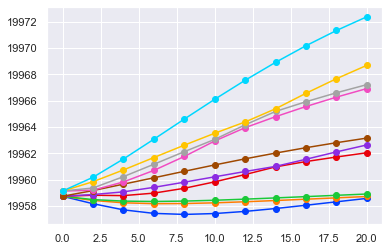

In [85]:
for line in BT:
    plt.plot(Bscan,line,marker='o')

In [237]:
import csv

def write_labeled_CSV_rows(data_array,file_path,label_array):
    data_array = np.array(data_array)
    save_all = []
    save_all.append(label_array)
    for _data in data_array:
        save_all.append(_data)
    writeCSVrows(save_all,file_path)
    
def writeCSVrows(array_of_arrays,filepath):
    with open(filepath,'w+',newline='') as f:
        w = csv.writer(f)
        for array in array_of_arrays:
            w.writerow(array)
    print('Done! Array written to', filepath)
    return

In [238]:
write_labeled_CSV_rows(table_N21,'CaOH_X010_N21_lines.csv',header_N21)
write_labeled_CSV_rows(table_N12,'CaOH_X010_N12_lines.csv',header_N12)

Done! Array written to CaOH_X010_N21_lines.csv
Done! Array written to CaOH_X010_N12_lines.csv


In [83]:
x_labels = [X010.gen_state_str(i,thresh=0.1,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_I','M_F'],round=2) for i in N2]
display(Latex(x_labels[7]))

<IPython.core.display.Latex object>

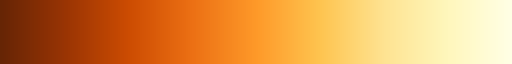

In [68]:
sns.color_palette("YlOrBr_r", as_cmap=True)

In [123]:
Bz = np.linspace(1e-6,5,1000)
Ez = np.linspace(0,200,1000)

In [124]:
X010.StarkMap(Ez,1e-3,plot=False)
# X010.plot_evals_EB('E',kV_kG=True,GHz=True)

In [108]:
X010.ZeemanMap(Bz,0,plot=False)

In [135]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_B.T[N2]):
    plt.plot(Bz,trace)
plt.xlabel('B (G)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Zeeman Shifts, $N=2-$',fontsize=16);
plt.ylim(49865,49885)

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N1]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Bz,grad)
plt.xlabel('B (G)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Magnetization, $N=2-$',fontsize=16);

AttributeError: 'NoneType' object has no attribute 'T'

<Figure size 720x504 with 0 Axes>

(9900.0, 10090.0)

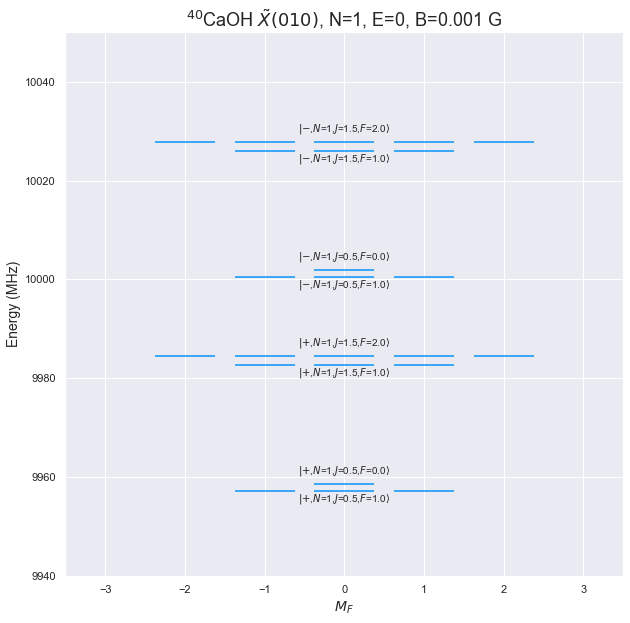

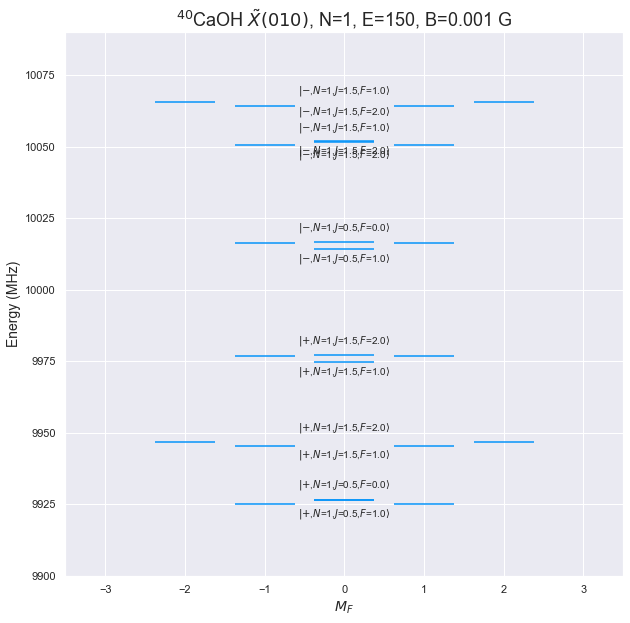

In [57]:
E0=0
B0=1e-3
N=1
X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
plt.title(X010.state_str+', N={}, E={}, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)
plt.ylim(9940,10050)

E0=150
B0=1e-3
N=1
X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
plt.title(X010.state_str+', N={}, E={}, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)
plt.ylim(9900,10090)

# N=2
# X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
# plt.title(X010.state_str+', N={}, E={} V/cm, B={} G'.format(N,E0,B0),fontsize=18)
# plt.xlim(-3.5,3.5)

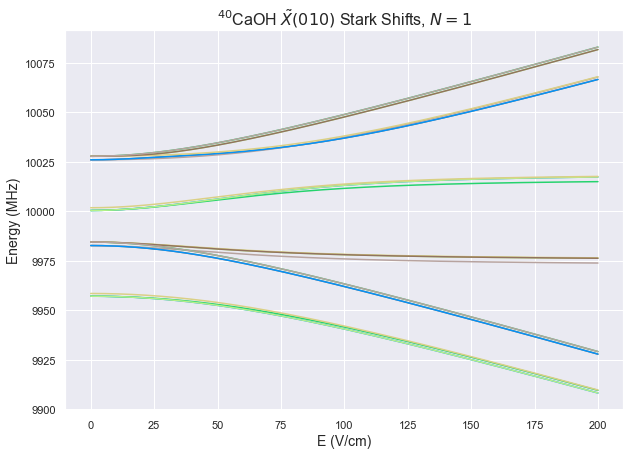

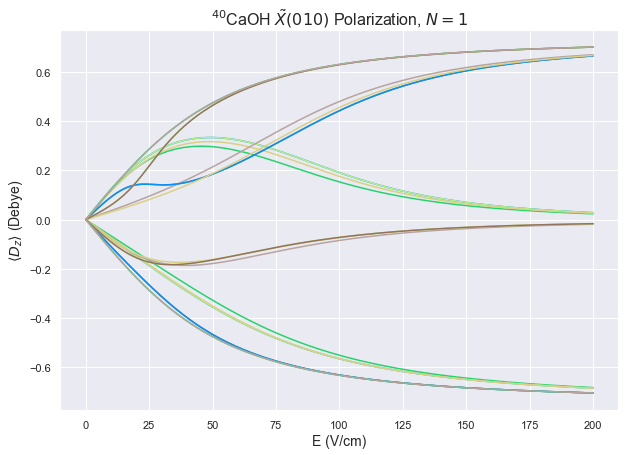

In [133]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[0]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[0]]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad*1.986)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'$\langle D_z \rangle$ (Debye)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

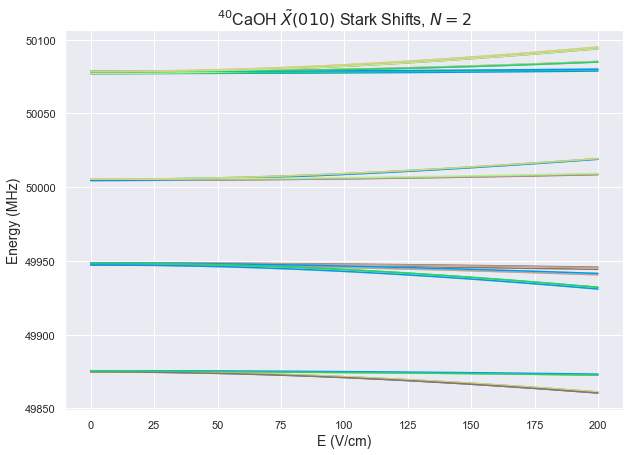

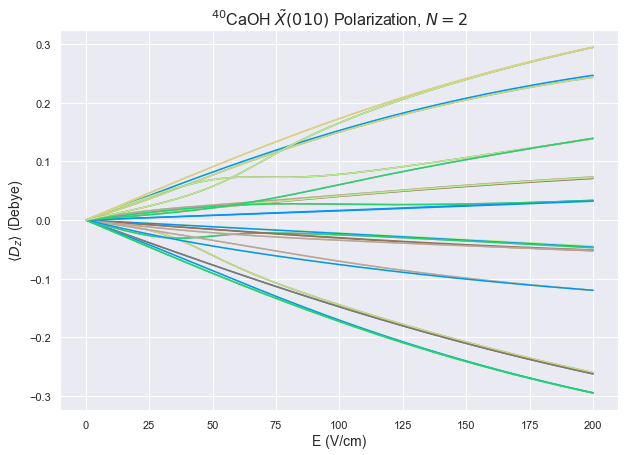

In [134]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[1]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=2$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[1]]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad*1.986)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'$\langle D_z \rangle$ (Debye)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=2$',fontsize=16);

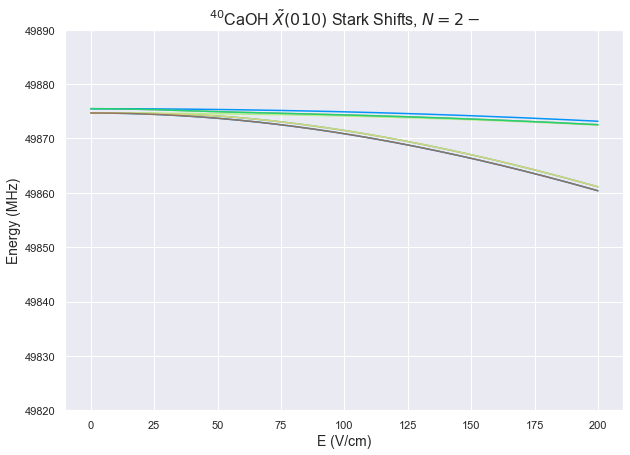

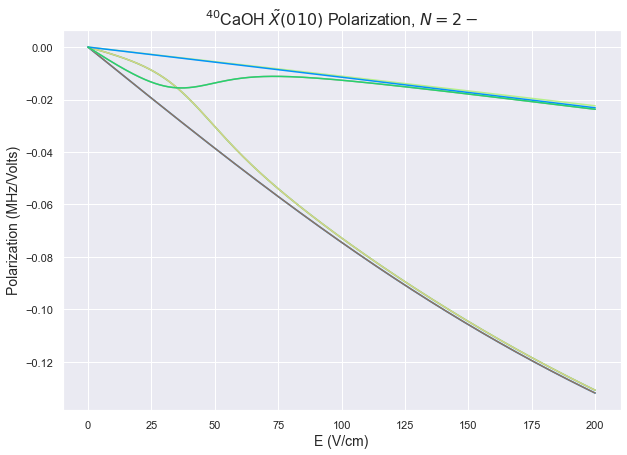

In [135]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N2_all]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=2-$',fontsize=16);
plt.ylim(49820,49890)

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N2_all]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=2-$',fontsize=16);

In [36]:
X010.display_levels(0,1e-6,'F',idx=N1_all,label_q=[q for q in X010.q_str if q!='K'],alt_label=True)
plt.title(X010.state_str+', N=1d',fontsize=18)

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, N=1,2, Free Field')

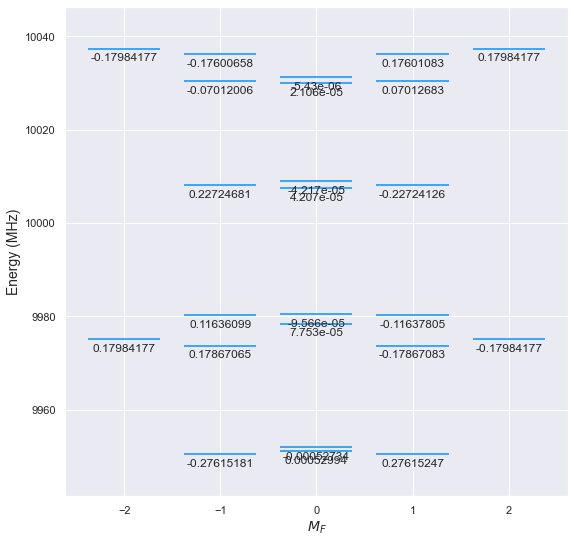

In [130]:
# X010 = MoleculeLevels.initialize_state('CaOH','40','X010',N_list,M_values = 'custom',I=[0,1/2],S=1/2,round=16,M_range=[1])
X010 = MoleculeLevels.initialize_state('CaOH','40','X010',[1],M_values = 'all',I=[0,1/2],S=1/2,round=8)
X010.display_PTV(60.8,1e-3,'EDM')

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, N=1,2 60 V/cm, 1e-06 G')

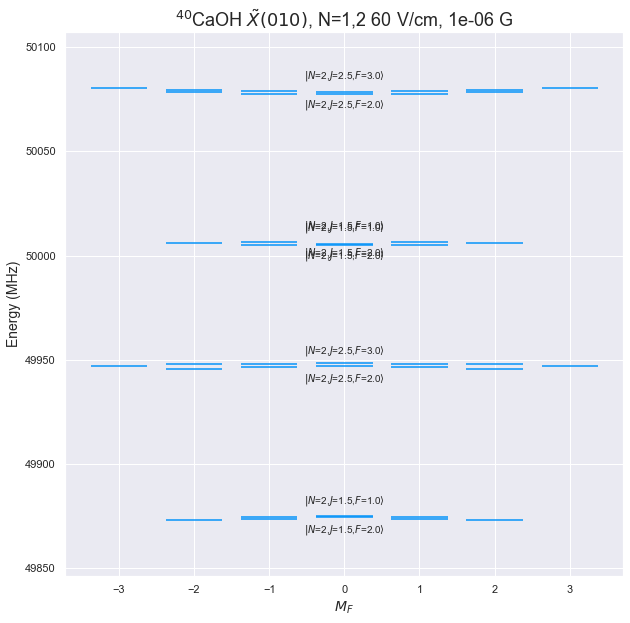

In [14]:
Efield = 60
Bfield = 1e-6
X010.display_levels(Efield,Bfield,'F',idx=N2,label_q=[q for q in X010.q_str if q!='K'],alt_label=True)
plt.title(X010.state_str+', N=1,2 {} V/cm, {} G'.format(Efield,Bfield),fontsize=18)

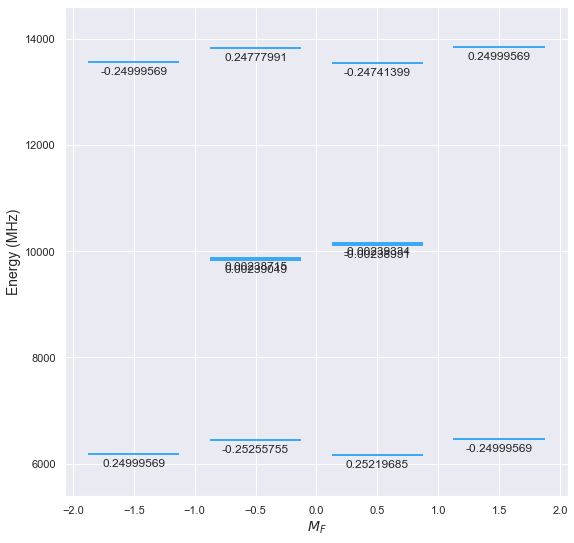

In [41]:
X010.display_PTV(,'EDM')

In [34]:
evals, evecs = X010.eigensystem(Efield,Bfield,order=True,method='torch')
M0_idx = X010.select_q({'M':[-3/2,-1/2,1/2,3/2]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','J','F','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.05,round=4)))
    print('\n')

[ 0  1  2  3  4  5  6  7  8  9 10 11]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

In [117]:
evals, evecs = X010.eigensystem(1000,1e-8,order=True,method='torch')
M0_idx = X010.select_q({'M':[0]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.01,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.01,label_q=['J','K','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.01,round=4)))
    print('\n')

[ 2  3  8 11 12 15 18 19]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

In [42]:
Bz = np.linspace(1e-6,40,1000)
Ez = np.linspace(0,500,1000)

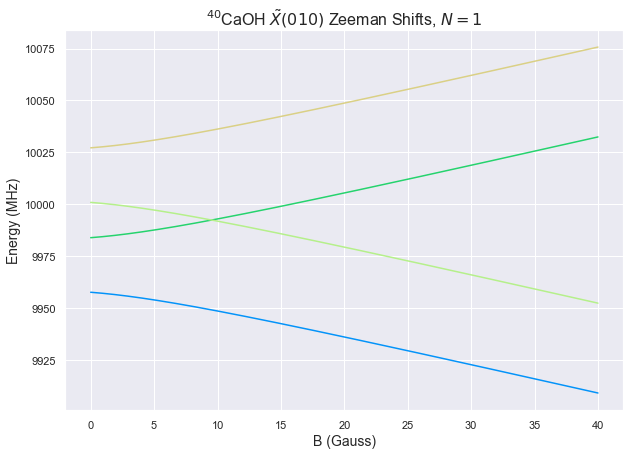

In [75]:
X010.ZeemanMap(Bz,0,plot=True)

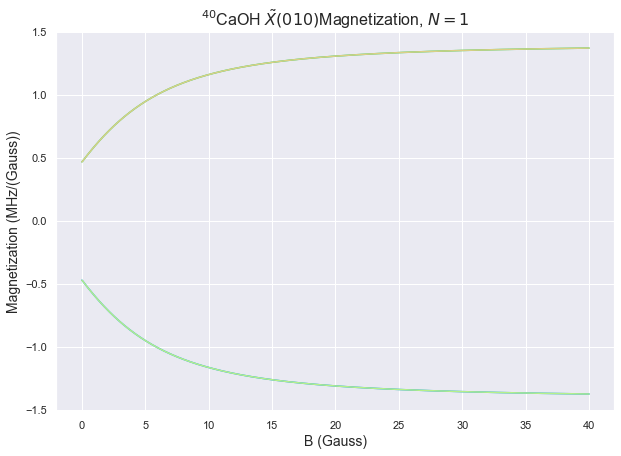

In [76]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_B.T):
    grad = np.gradient(trace)/(Bz[1]-Bz[0])
    plt.plot(Bz,grad)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Magnetization (MHz/(Gauss))',fontsize=14)
plt.title(X010.state_str + r'Magnetization, $N={}$'.format(*X010.N_range),fontsize=16);

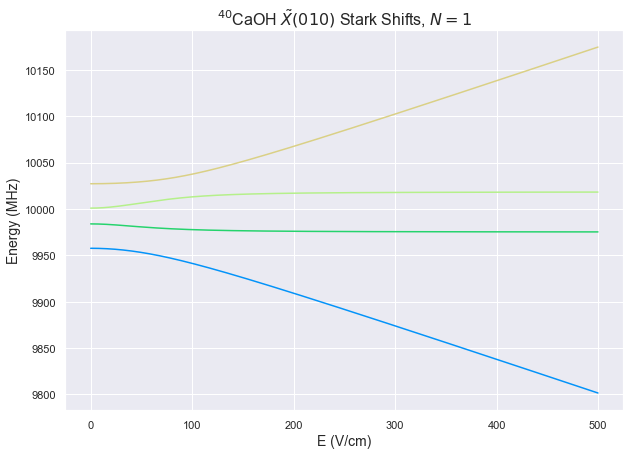

In [78]:
X010.StarkMap(Ez,1e-6,plot=True)
# X010.plot_evals_EB('E',kV_kG=True,GHz=True)

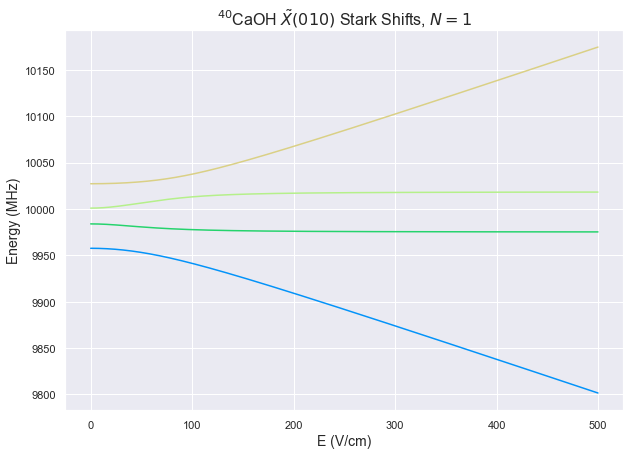

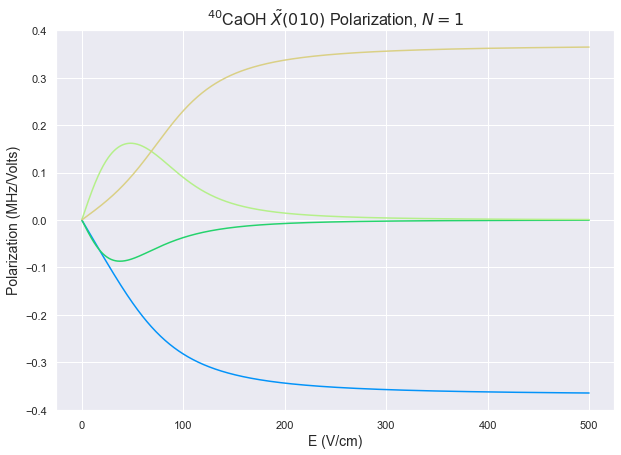

In [98]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

We can display a plot of the energy levels at arbitray field. (The code does not handle parity labeling well, so I am leaving out L for zero field.)

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, N=1, 0.5 kV/cm')

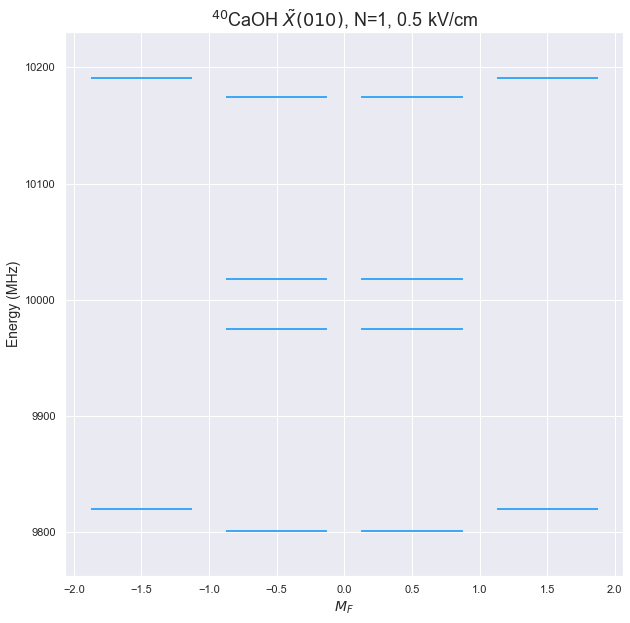

In [47]:
X010.display_levels(500,1e-7,'F',label=None,alt_label=True)
plt.title(X010.state_str+', N=1, 0.5 kV/cm',fontsize=18)

We can also look at PT violating shifts. Here, we consider the EDM shifts as a function of E field. 

In [48]:
X010.eigensystem(0,1e-8);

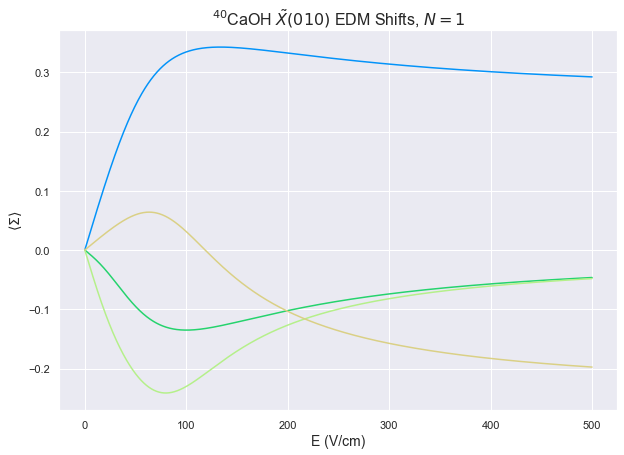

In [85]:
X010.PTV_Map('EDM',E_or_B='E',plot=True)

We can look specifically at the upper and lower Stark manifolds at a given field value too.

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, EDM shifts at 60.8 V/cm')

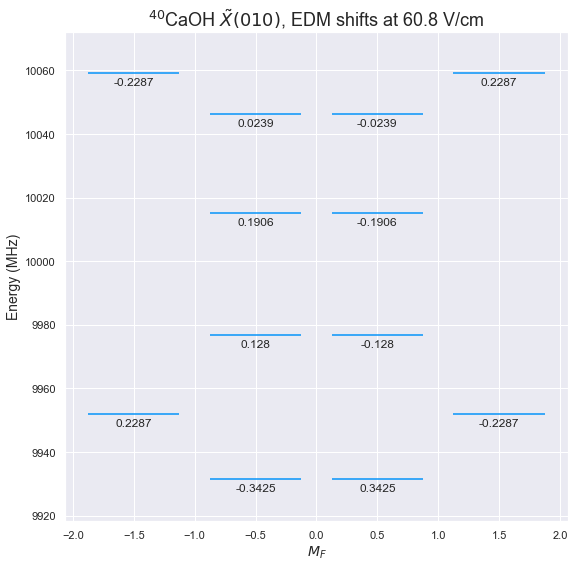

In [51]:
X010.display_PTV(133,1e-7,'EDM',round=4)
plt.title(X010.state_str+', EDM shifts at 60.8 V/cm',fontsize=18)

In [60]:
X010.eigensystem(1000,0)
M0_idx = X010.select_q({'M':[1]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.01,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.01,label_q=['K','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.01,round=4)))
    print('\n')

[0 1 2 3 4 5]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

In [50]:
X010.eigensystem(100,1e-2)
(sy.Matrix(X010.evecs0[0]).T*X010.H_symbolic*sy.Matrix(X010.evecs0[0]))[0]

-0.048487643331535*Bz - 0.277154404334809*Ez + 9969.35364112334

In [43]:
(sy.Matrix(X010.evecs0[1]).T*X010.H_symbolic*sy.Matrix(X010.evecs0[1]))[0]

1.28069264538709*Bz - 0.368490639112473*Ez + 9987.63731699745

In [20]:
import matrix_elements_sym as me
from functools import partial
from matrix_elements_sym import decouple_b_even

def H_even_X(q_numbers,params,matrix_elements,symbolic=True,E=0,B=0,M_values='all',precision=5):
    q_str = list(q_numbers)     # Get keys for quantum number dict
    if symbolic:
        Ez,Bz = sy.symbols('E_z B_z')
        size = len(q_numbers[q_str[0]])
        # Need to construct empty matrices to fill with matrix elements
        # Sympy does not like numpy arrays, so convert to list
        H0 = np.zeros((size,size)).tolist()
        V_B = np.zeros((size,size)).tolist()
        V_E = np.zeros((size,size)).tolist()
        #Iz = np.zeros((size,size)).tolist()
        #Sz = np.zeros((size,size)).tolist()
        for i in range(size):
            for j in range(size):
                # State out is LHS of bra ket, state in is RHS
                state_out = {q+'0':q_numbers[q][i] for q in q_str}
                state_in = {q+'1':q_numbers[q][j] for q in q_str}
                q_args = {**state_out,**state_in}
                elements = {term: sy.nsimplify(element(**q_args)) for term, element in matrix_elements.items()}
                # The Hamiltonian
                H0[i][j] = params['Be']*elements['N^2'] + params['Gamma_SR']*elements['N.S'] + \
                    params['bF']*elements['I.S'] + params['c']/3*sy.sqrt(6)*elements['T2_0(I,S)']
                if params.get('q_lD') is not None:
                    H0[i][j] += params['q_lD']/2*elements['l-doubling'] - params['Gamma_SR']*elements['NzSz']+params['Gamma_Prime']*elements['NzSz']
                if M_values!='none':
                    V_B[i][j]+=params['g_S']*params['mu_B']*elements['ZeemanZ']
                    V_E[i][j]+=-params['muE']*elements['StarkZ']
                # H[i][j] = round(H[i][j],precision)
                #Iz[i][j] = params['c']*elements['Iz']
                #Sz[i][j] = elements['Sz']
        # Need to construct IzSz term and add to Hamiltonian
        #H=matadd(H,matmult(Iz,Sz))
        # Create symbolic object
        H_symbolic = sy.Matrix(H0)+Ez*sy.Matrix(V_E)+Bz*sy.Matrix(V_B)
#         H0_num = np.array(H0).astype(np.float64)
#         V_E_num = np.array(V_E).astype(np.float64)
#         V_B_num = np.array(V_B).astype(np.float64)
        # Use symbolic object to create function that given E and B values, returns a numpy array
#         H_func = lambda E,B: H0_num + V_E_num*E + V_B_num*B
        # H_func = sy.lambdify((Ez,Bz), H_symbolic, modules='numpy')
        return H_symbolic

def decouple_b(input_qnumbers,output_qnumbers,S=1/2,I=1/2):
    input_keys = list(input_qnumbers)
    output_keys = list(output_qnumbers)
    input_size = len(input_qnumbers[input_keys[0]])
    output_size = len(output_qnumbers[output_keys[0]])
    basis_matrix = np.zeros((output_size,input_size)).tolist()
    for i in range(output_size):
        for j in range(input_size):
            decoupled_qnumbers = {q:output_qnumbers[q][i] for q in output_keys}
            b_qnumbers = {q:input_qnumbers[q][j] for q in input_keys}
            basis_matrix[i][j] = sy.nsimplify(decouple_b_even(decoupled_qnumbers,b_qnumbers,S=S,I=I))
    return basis_matrix
   
    

bBJ_even_X_matrix_elements={
        # Fine Structure
        'N^2': me.Rot_bBJ,                 # N^2 Rotation
        'N.S': me.SR_bBJ,                  # N.S Spin Rotation
        'l-doubling': me.lD_bBJ,           # Effective l doubling
        'NzSz': me.NzSz_bBJ,               # NzSz for bending mode

        # Hydrogen Hyperfine
        'I.S': me.IS_bBJ,                  # I.S Fermi Contact Interaction
        'T2_0(I,S)': me.T2IS_bBJ,          # I S dipolar interaction
        'Iz': me.Iz_bBJ,                   # I.n projection of I on internuclear axis n
        'Sz': me.Sz_bBJ,                   # S.n projection of S on internuclear axis n
        }

ext_fields = {
# External Fields
'ZeemanZ': me.ZeemanZ_bBJ,         # Zeeman interaction with lab z magnetic field
'StarkZ': me.StarkZ_bBJ            # Stark interaction with lab z electric field
}
bBJ_even_X_matrix_elements.update(ext_fields)
for term,element in bBJ_even_X_matrix_elements.items():       #iterate through, substitute hydrogen proton value
            bBJ_even_X_matrix_elements[term] = partial(element,I=1/2)

        

B,gamma,gammap, bF,c,b,q_lD,muE,muB,g_S,g_L = sy.symbols('B_{rot} gamma gamma^\' b_F c b q_{lD} D mu_B g_S g_L')
params_40X010 = {
'Be': B,
'Gamma_SR': gamma,
'Gamma_Prime': gammap,
'bF': bF,
'c': c,
'b': b,
'q_lD': q_lD,
'muE': muE,
'mu_B': muB, #MHz/Gauss
'g_S': g_S,
'g_L': g_L,
}

def build_operator(q_numbers,parameter,operator_element,M_values='all',precision=5):
    q_str = list(q_numbers)     # Get keys for quantum number dict
    size = len(q_numbers[q_str[0]])
    # Need to construct empty matrices to fill with matrix elements
    # Sympy does not like numpy arrays, so convert to list
    H0 = np.zeros((size,size)).tolist()
    #Iz = np.zeros((size,size)).tolist()
    #Sz = np.zeros((size,size)).tolist()
    for i in range(size):
        for j in range(size):
            # State out is LHS of bra ket, state in is RHS
            state_out = {q+'0':q_numbers[q][i] for q in q_str}
            state_in = {q+'1':q_numbers[q][j] for q in q_str}
            q_args = {**state_out,**state_in}
            operator = sy.nsimplify(operator_element(**q_args))
            H0[i][j]+= parameter*operator
    H_symbolic = sy.Matrix(H0)
    return H_symbolic

In [21]:
H_sym = H_even_X(X010.q_numbers,params_40X010,bBJ_even_X_matrix_elements,symbolic=True,E=0,B=0,M_values='all',precision=8)

In [22]:
(H_sym)

Matrix([
[B_{rot} + b_F/4 + c/6 - gamma/2 - gamma^'/2,                                     -q_{lD},                                                                         0,                                                                         0,                     -B_z*g_S*mu_B/6 + D*E_z/3,                                             0,                                                                         0,                                                                         0,                                                                                 0,                                                                                 0,          -sqrt(2)*B_z*g_S*mu_B/3 + sqrt(2)*D*E_z/6,                                                   0,                                                                                0,                                                                                0,                                                                        

In [23]:
NzSz = build_operator(X010.q_numbers,params_40X010['Gamma_Prime'],bBJ_even_X_matrix_elements['NzSz'],precision=8)
NS = build_operator(X010.q_numbers,params_40X010['Gamma_SR'],bBJ_even_X_matrix_elements['N.S'],precision=8)

In [24]:
NS-NzSz

Matrix([
[-gamma + gamma^'/2,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0],
[                 0, -gamma + gamma^'/2,                  0,                  0,                  0,                  0,                  0,                  0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                  

In [25]:
inputt = X010.q_numbers
output = X010.alt_q_numbers['decoupled']
basis_matrix = sy.Matrix(decouple_b(inputt,output,I=1/2))

In [26]:
H_dcpl = basis_matrix*H_sym*basis_matrix.T

In [27]:
NzSz_dcpl = basis_matrix*NzSz*basis_matrix.T
NS_dcpl = basis_matrix*NS*basis_matrix.T

In [28]:
SR_dcpl = NS_dcpl-NzSz_dcpl

In [29]:
SR_dcpl

Matrix([
[gamma/2 - gamma^'/4,                   0,                   0,                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                   0,                   0,                   0,                   0],
[                  0, gamma/2 - gamma^'/4,                   0,                   0,                                   0,                                   0,                                   0,                                  

In [24]:
ilist = range(0,24)
for i in ilist:
    print(i)
    for k,v in X010.alt_q_numbers['decoupled'].items():
        print('{} = {}'.format(k,v[i]))

0
K = -1
N = 1
M_N = -1
M_S = -0.5
M_I = 0
M_F = -1.5
1
K = 1
N = 1
M_N = -1
M_S = -0.5
M_I = 0
M_F = -1.5
2
K = -1
N = 1
M_N = -1
M_S = 0.5
M_I = 0
M_F = -0.5
3
K = 1
N = 1
M_N = -1
M_S = 0.5
M_I = 0
M_F = -0.5
4
K = -1
N = 1
M_N = 0
M_S = -0.5
M_I = 0
M_F = -0.5
5
K = 1
N = 1
M_N = 0
M_S = -0.5
M_I = 0
M_F = -0.5
6
K = -1
N = 1
M_N = 0
M_S = 0.5
M_I = 0
M_F = 0.5
7
K = 1
N = 1
M_N = 0
M_S = 0.5
M_I = 0
M_F = 0.5
8
K = -1
N = 1
M_N = 1
M_S = -0.5
M_I = 0
M_F = 0.5
9
K = 1
N = 1
M_N = 1
M_S = -0.5
M_I = 0
M_F = 0.5
10
K = -1
N = 1
M_N = 1
M_S = 0.5
M_I = 0
M_F = 1.5
11
K = 1
N = 1
M_N = 1
M_S = 0.5
M_I = 0
M_F = 1.5
12


IndexError: list index out of range

In [25]:
vec = np.zeros(24)
vec[6] = 1/sy.sqrt(2) #
vec[17] = 1/sy.sqrt(2)

In [26]:
NS_dcpl-NzSz_dcpl

Matrix([
[gamma/4,       0,               0,               0,               0,               0,               0,               0,               0,               0,       0,       0],
[      0, gamma/4,               0,               0,               0,               0,               0,               0,               0,               0,       0,       0],
[      0,       0,        -gamma/4,               0, sqrt(2)*gamma/4,               0,               0,               0,               0,               0,       0,       0],
[      0,       0,               0,        -gamma/4,               0, sqrt(2)*gamma/4,               0,               0,               0,               0,       0,       0],
[      0,       0, sqrt(2)*gamma/4,               0,               0,               0,               0,               0,               0,               0,       0,       0],
[      0,       0,               0, sqrt(2)*gamma/4,               0,               0,               0,               0, 

In [27]:
H_dcpl=sy.simplify(H_dcpl)
H_dcpl

Matrix([
[-B_z*g_S*mu_B/2 + B_{rot} - D*E_z/2 + gamma/4,                                       -q_{lD},                                            0,                                            0,                         0,                         0,                        0,                        0,                                             0,                                             0,                                            0,                                            0],
[                                      -q_{lD}, -B_z*g_S*mu_B/2 + B_{rot} + D*E_z/2 + gamma/4,                                            0,                                            0,                         0,                         0,                        0,                        0,                                             0,                                             0,                                            0,                                            0],
[                              

In [135]:
X010.eigensystem(1000,0)
even = sy.Matrix([0,1/sy.sqrt(2),0,0,0,0,1/sy.sqrt(2),0])
odd = sy.Matrix([1/sy.sqrt(2),0,0,0,0,0,0,-1/sy.sqrt(2)])
x = sy.simplify(even.T*H_dcpl*even)
y = sy.simplify(odd.T*H_dcpl*odd)
x[0]

B_{rot} + D*E_z/2 + b_F/4 + c/60 - gamma/4

In [136]:
y[0]

B_{rot} - D*E_z/2 + b_F/4 + c/60 - gamma/4

In [142]:
X010.eigensystem(1000,)
x = sy.Matrix(X010.evecs0[0]).T*H_sym*sy.Matrix(X010.evecs0[0])
y = sy.Matrix(X010.evecs0[1]).T*H_sym*sy.Matrix(X010.evecs0[1])
sy.N(x-y)[0]

-1.09823410572936e-11*B_z*g_S*mu_B + 3.74903172901661e-5*D*E_z - 0.00019018948895402*b_F - 0.0122648086400407*c - 5.8647193332706e-5*gamma + 0.00118230125639449*q_{lD}

In [42]:
X010.H_symbolic

Matrix([
[                           9980.21896666667,                                      21.649,         -0.4670780207227*Bz + 0.24583286*Ez,                                           0, -1.32109614318485*Bz + 0.173830082344483*Ez,                                           0,                                           0,                                           0],
[                                     21.649,                            9980.21896666667,                                           0,         -0.4670780207227*Bz - 0.24583286*Ez,                                           0, -1.32109614318485*Bz - 0.173830082344483*Ez,                                           0,                                           0],
[        -0.4670780207227*Bz + 0.24583286*Ez,                                           0,                            9978.89541111111,                                      21.649,                            1.14594510633293,                                          

In [17]:
X010.eigensystem(100000,0)
M0_idx = X010.select_q({'M':[0]})
print(M0_idx)
for i in M0_idx:
    print('E =',X010.evals0[i])
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.001,label_q=['K','M_N','M_S','M_I','M_F'])))
#     display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','Sigma','P','M'])))
#     display(Latex(X010.gen_state_str(i,thresh=0.05)))

[0 1 2 3 4 5 6 7]
E = -26869.87053477218


<IPython.core.display.Latex object>

E = -26869.753213628093


<IPython.core.display.Latex object>

E = 9973.151313958582


<IPython.core.display.Latex object>

E = 10016.449292801037


<IPython.core.display.Latex object>

E = 10042.423225935365


<IPython.core.display.Latex object>

E = 10085.720997939427


<IPython.core.display.Latex object>

E = 46880.36769489169


<IPython.core.display.Latex object>

E = 46880.485222874166


<IPython.core.display.Latex object>

In [83]:
X010.eigensystem(0,1e-6)
X010.g_eff_Map(step=1e-6);

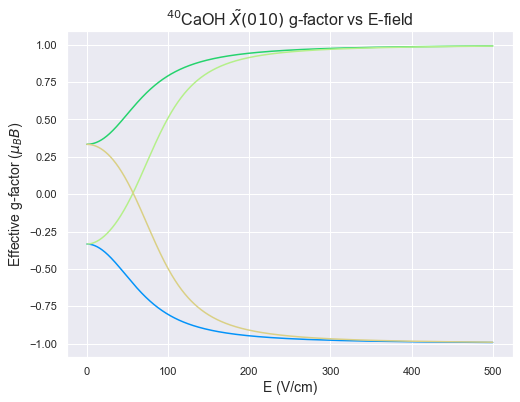

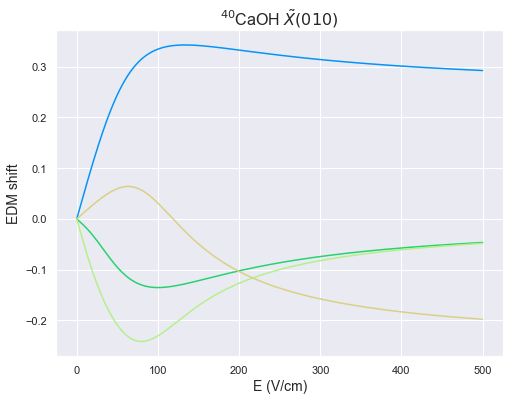

In [86]:
j = range(len(X010.evals0))
plt.figure(figsize=(8,6))
for i in range(len(X010.g_eff_E.T)):#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X010.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Effective g-factor ($\mu_B B$)',fontsize=14)
plt.title(X010.state_str + ' g-factor vs E-field',fontsize=16);
plt.figure(figsize=(8,6))
for i in range(len(X010.g_eff_E.T)):#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X010.PTV_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(X010.state_str,fontsize=16);

In [81]:
X010.eigensystem(0,1e-6)
M_idx = X010.select_q({'M':[1/2]})
print(M_idx)

[0 1 2 3]


IndexError: index 4 is out of bounds for axis 0 with size 4

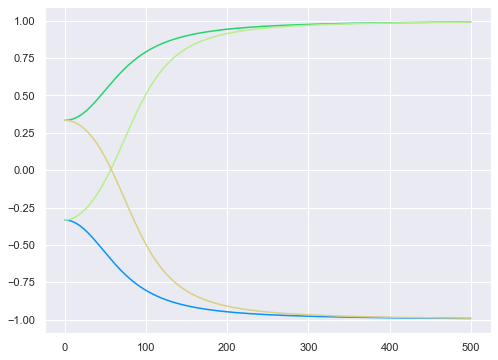

In [87]:
j = range(len(X010.evals0))
plt.figure(figsize=(8,6))
for i in range(10):#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X010.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Effective g-factor ($\mu_B B$)',fontsize=14)
plt.title(X010.state_str + ' g-factor vs E-field',fontsize=16);
plt.xlim(53,73)
plt.figure(figsize=(8,6))
for i in range(12):#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X010.PTV_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(X010.state_str,fontsize=16);
plt.xlim(53,73);

In [175]:
for j in [12,18]:
    g_eff = X010.g_eff_E.T[j]
    for i in range(1,len(g_eff)):
        if (g_eff[i]>0 and g_eff[i-1]<0) or g_eff[i]<0 and g_eff[i-1]>0:
            print('idx =',j)
            print('E field =',(Ez[i]+Ez[i-1])/2)
            print('PTV =,',(X010.PTV_E.T[j][i]+X010.PTV_E.T[j][i-1])/2)
            print('Energy =',(X010.evals_E.T[j][i]+X010.evals_E.T[j][i-1])/2)

idx = 12
E field = 60.83108310831083
PTV =, -0.22727988
Energy = 10008.053070099853
idx = 18
E field = 65.28152815281528
PTV =, 0.070567485
Energy = 10030.921999206803


In [196]:
X010.eigensystem(1000,1e-7)
M_idx = X010.select_q({'M':[0]})
idx = M_idx
for i in idx:
    print(idx)
    print(X010.g_eff_EB()[i])
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['J','K','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.05,round=4)))
    print('\n')

[ 2  3  8 11 12 15 18 19]
3.8988801882439546e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
7.797760376487909e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-1.2996267294146515e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-2.599253458829303e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-1.2996267294146515e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-3.8988801882439546e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-2.599253458829303e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
1.2996267294146515e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, EDM shifts at 65.28 V/cm')

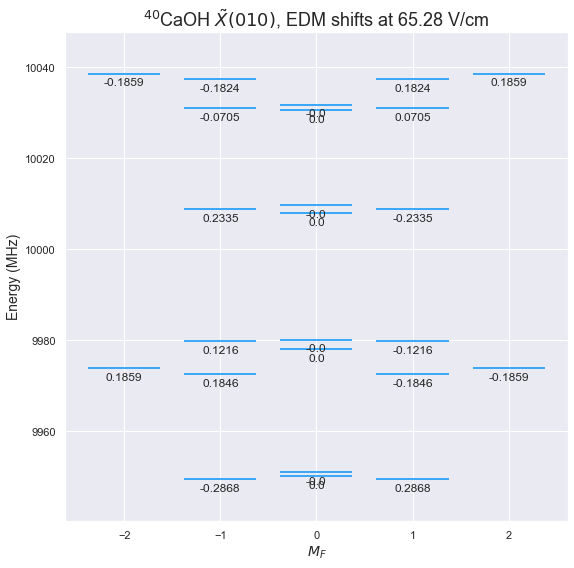

In [179]:
X010.display_PTV(65.28,1e-7,'EDM',round=4)
plt.title(X010.state_str+', EDM shifts at 65.28 V/cm',fontsize=18)

[ 1  3  5  9 13 15 17 21]
1 1.45e-05 499.7999799979998
3 1.45e-05 499.74997499749975
5 1.3e-07 105.06050605060506
9 1.3e-07 90.65906590659066
13 1.6e-07 105.71057105710571
15 1.8e-07 106.66066606660665
17 1.149e-05 499.8999899989999
21 1.149e-05 499.84998499849985


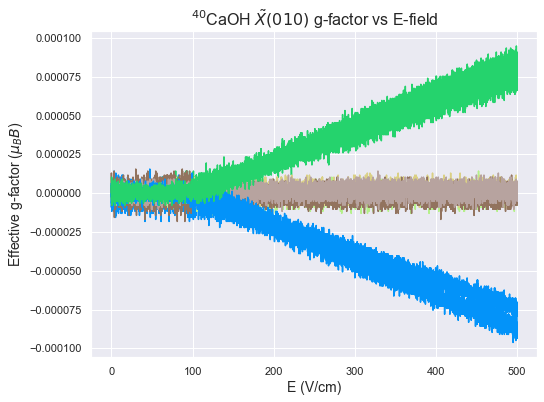

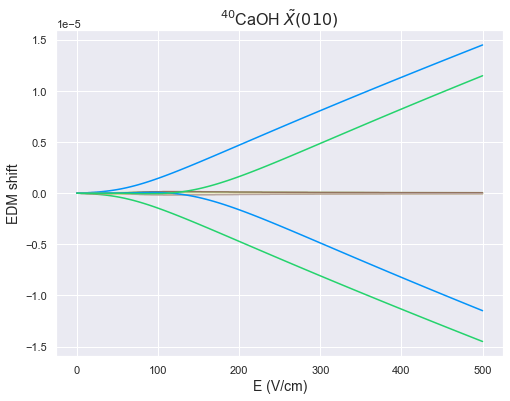

In [192]:
X010.eigensystem(0,1e-6)
M_idx = X010.select_q({'M':[0]})
print(M_idx)

j = range(len(X010.evals0))
plt.figure(figsize=(8,6))
for i in M_idx:#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X010.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Effective g-factor ($\mu_B B$)',fontsize=14)
plt.title(X010.state_str + ' g-factor vs E-field',fontsize=16);
plt.figure(figsize=(8,6))
for i in M_idx:#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X010.PTV_E.T[i])
    print(i,max(abs(X010.PTV_E.T[i])),Ez[np.argmax(abs(X010.PTV_E.T[i]))])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(X010.state_str,fontsize=16);

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, EDM shifts at 1000 V/cm and 10 mG')

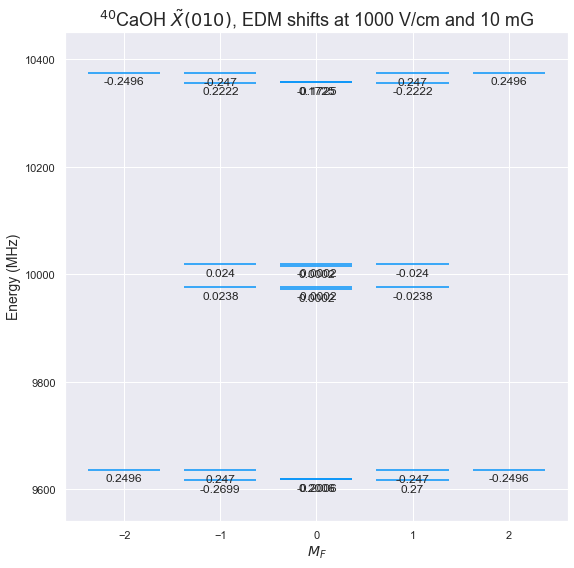

In [199]:
X010.display_PTV(1000,1e-2,'EDM',round=4)
plt.title(X010.state_str+', EDM shifts at 1000 V/cm and 10 mG',fontsize=18)

In [105]:
import time
X010_p = MoleculeLevels.initialize_state('CaOH','40','X010',N_list,M_values = 'custom',I=[0,1/2],S=1/2,round=8,M_range=[1])

Bz = np.linspace(1e-6,20,1000)
Ez = np.linspace(0,500,1000)
t0 = time.perf_counter()
Bslices_p = X010_p.EB_grid(Ez,Bz,PTV=True,E_or_B_first='B',output=True,EDM_or_MQM='EDM')
t1 = time.perf_counter()
elapsed = t1 - t0
print(elapsed, 'sec')

25.03476210000008 sec


In [49]:
import json
import ujson as uj

def get_json_data(file_path,numpy=False,ujson=True):
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path, 'r') as f:
        if ujson:
            data = uj.load(f)
        else:
            data = json.load(f)
    if numpy:
        data = np.array(data)
    return data

def save_json_data(data,file_path,ujson=True):
    if type(data) is np.ndarray:
        data_save = data.tolist()
    else:
        data_save=data
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path,'w') as f:
        if ujson:
            uj.dump(data_save,f)
        else:
            json.dump(data_save,f)
    print('Data saved to', file_path)

In [50]:
# save_json_data(Bslices[0].tolist(),'X010_CaOH_Mpm0p5_EB_grid_evals_20220306')
# save_json_data(Bslices[1].tolist(),'X010_CaOH_Mpm0p5_EB_grid_PTV_20220306')

In [106]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  """


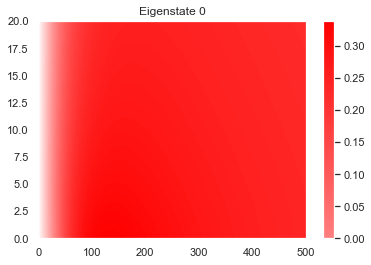

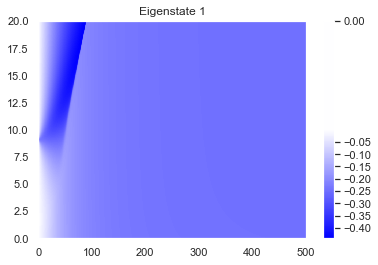

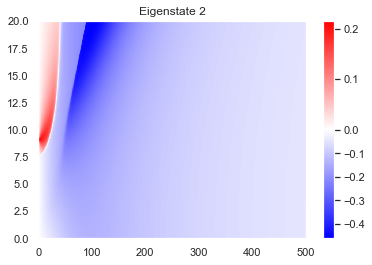

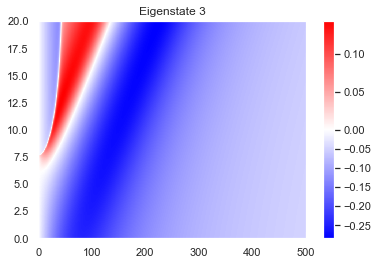

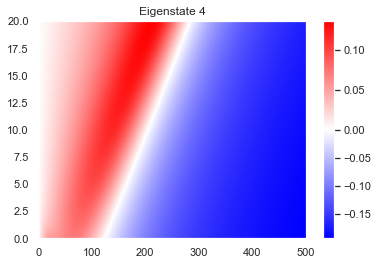

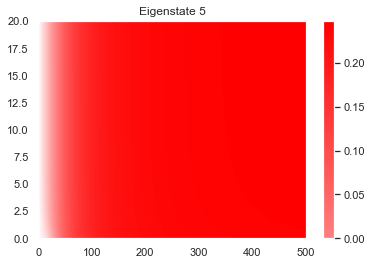

In [107]:
from matplotlib.colors import TwoSlopeNorm
for i in range(len(Bslices_p[0])):
    plt.figure()
    plt.pcolormesh(*mesh,Bslices_p[1][i],shading='auto',cmap='bwr',norm=TwoSlopeNorm(0))
    plt.colorbar()
    plt.title('Eigenstate {}'.format(i))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


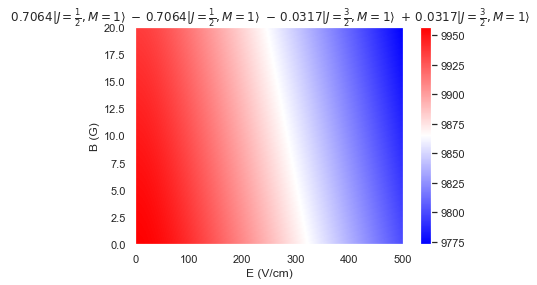

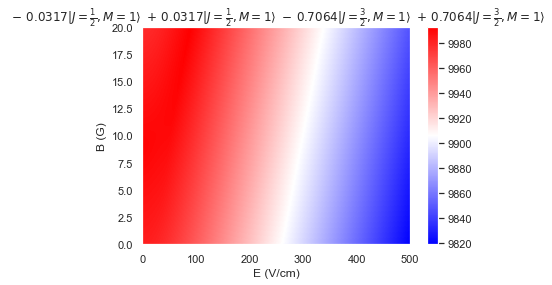

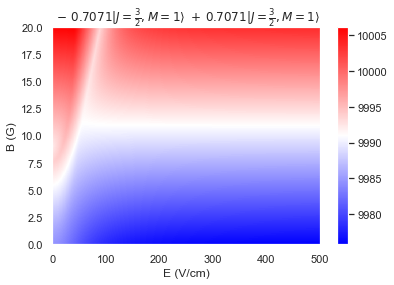

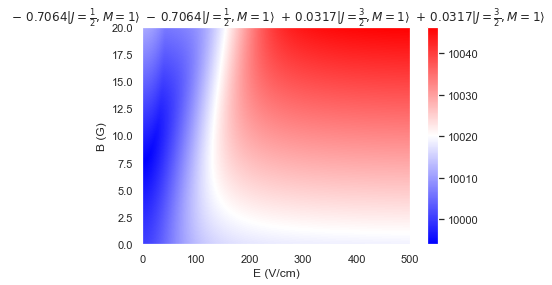

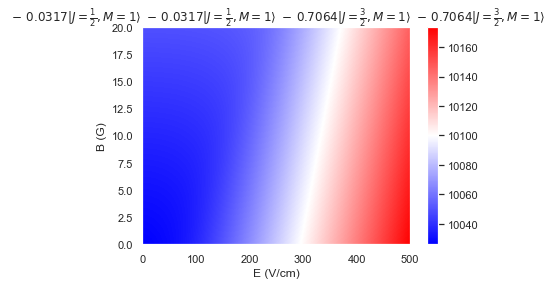

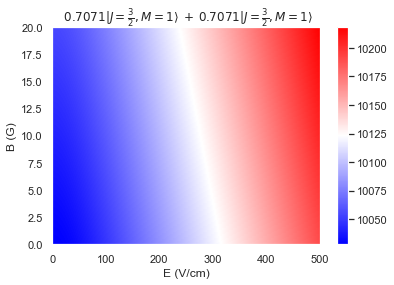

In [108]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(Bslices_p[0])):
    plt.figure()
    plt.grid(False)
    plt.pcolormesh(*mesh,Bslices_p[0][i],shading='auto',cmap='bwr')
    plt.colorbar()
    plt.title(X010_p.gen_state_str(i,round=4,label_q=['J','M']))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')

In [73]:
np.gradient(Bslices_p[0][0])[1]/(Bz[1]-Bz[0])

array([[-5355728.85423, -2678181.5899 , -1339206.26323, ...,
           -7655.38735,    -7654.93535,    -7654.7095 ],
       [-5355531.53913, -2678082.64793, -1339156.52261, ...,
           -7655.38253,    -7654.93054,    -7654.70469],
       [-5354934.98431, -2677784.10418, -1339007.56767, ...,
           -7655.36806,    -7654.91609,    -7654.69025],
       ...,
       [  -30677.45953,   -17459.08086,   -10543.94911, ...,
           -7165.79655,    -7165.78812,    -7165.7839 ],
       [  -30660.62245,   -17451.45616,   -10540.68135, ...,
           -7165.76865,    -7165.76022,    -7165.75601],
       [  -30643.80722,   -17443.84186,   -10537.41838, ...,
           -7165.74078,    -7165.73236,    -7165.72816]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  import sys


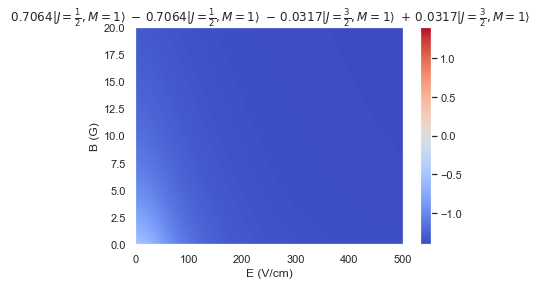

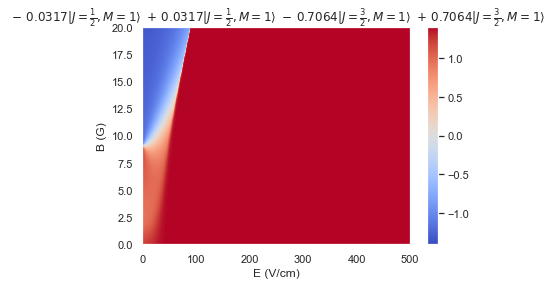

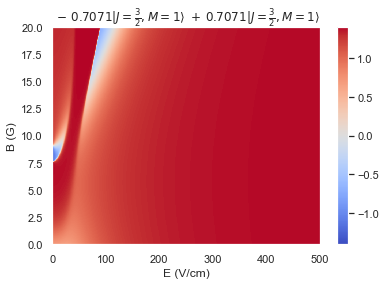

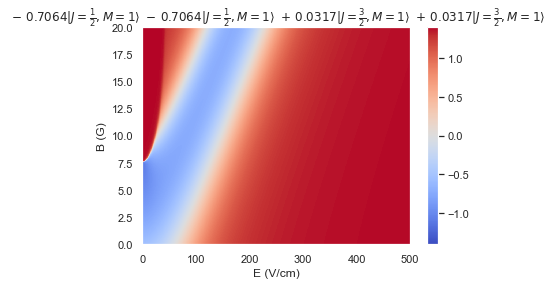

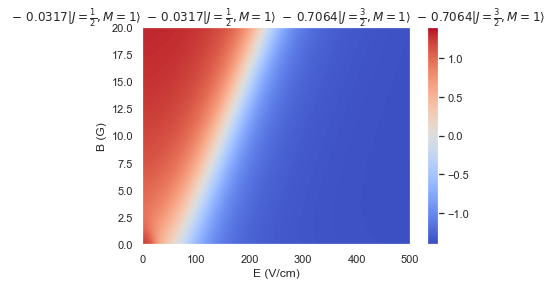

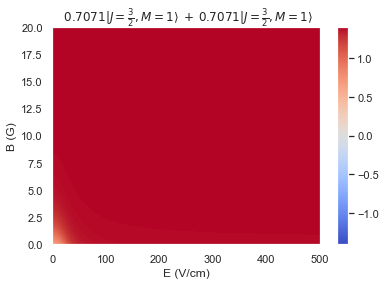

In [109]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(Bslices_p[0])):
    geff = np.gradient(Bslices_p[0][i])[1]/(Bz[1]-Bz[0])
    plt.figure()
    plt.grid(False)
    plt.pcolormesh(*mesh,geff,shading='auto',cmap='coolwarm',vmin=-1.4,vmax=1.4)
    plt.colorbar()
    plt.title(X010_p.gen_state_str(i,round=4,label_q=['J','M']))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')

In [97]:
np.log10(-0.01)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  import sys


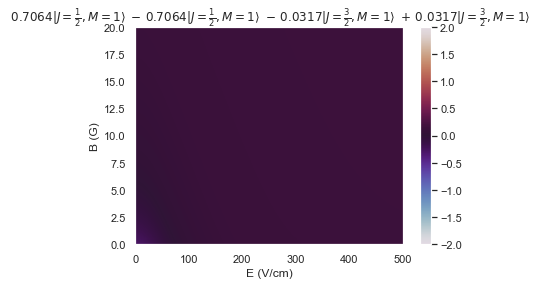

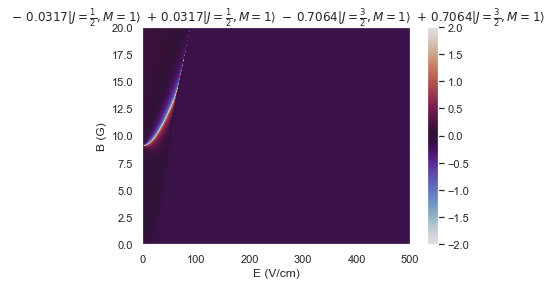

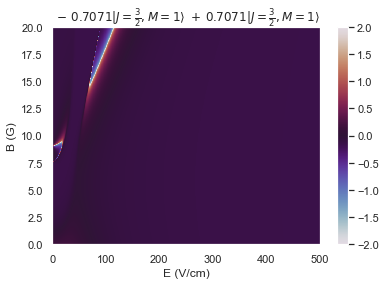

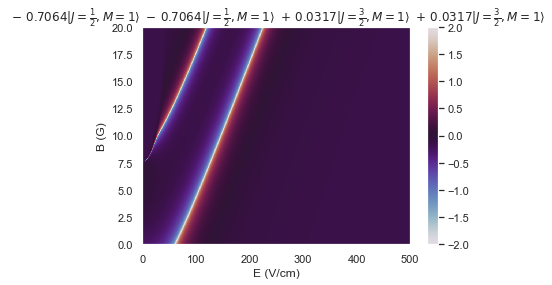

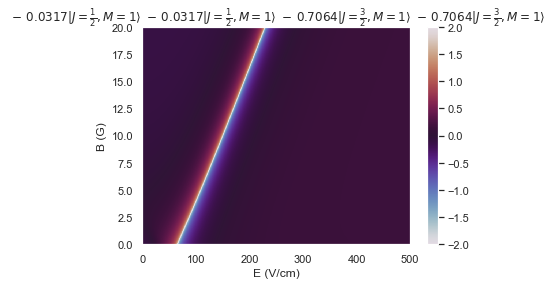

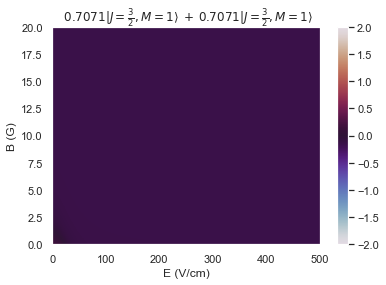

In [110]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(Bslices_p[0])):
    geff = np.gradient(Bslices_p[0][i])[1]/(Bz[1]-Bz[0])
    plt.figure()
    plt.grid(False)
    plt.pcolormesh(*mesh,-np.sign(geff)*np.log10(abs(geff)),shading='auto',cmap='twilight',vmin=-2,vmax=2)
    plt.colorbar()
    plt.title(X010_p.gen_state_str(i,round=4,label_q=['J','M']))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')